# Section A

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

results = pd.read_csv("results.csv")
shootouts = pd.read_csv("shootouts.csv")
goalscorers = pd.read_csv("goalscorers.csv")

**Results Table:**

In [7]:
results.shape

(47325, 9)

In [8]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47325 entries, 0 to 47324
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47325 non-null  object 
 1   home_team   47310 non-null  object 
 2   away_team   47310 non-null  object 
 3   home_score  47267 non-null  float64
 4   away_score  47267 non-null  float64
 5   tournament  47325 non-null  object 
 6   city        47325 non-null  object 
 7   country     47325 non-null  object 
 8   neutral     47325 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [9]:
results.head()

date 
 home_team 
 away_team 
 home_score 
 away_score 
 tournament 
 city 
 country 
 neutral 
 
 
 
 
 0 
 1872-11-30 
 Scotland 
 England 
 0.0 
 0.0 
 Friendly 
 Glasgow 
 Scotland 
 False 
 
 
 1 
 1873-03-08 
 England 
 Scotland 
 4.0 
 2.0 
 Friendly 
 London 
 England 
 False 
 
 
 2 
 1874-03-07 
 Scotland 
 England 
 2.0 
 1.0 
 Friendly 
 Glasgow 
 Scotland 
 False 
 
 
 3 
 1875-03-06 
 England 
 Scotland 
 2.0 
 2.0 
 Friendly 
 London 
 England 
 False 
 
 
 4 
 1876-03-04 
 Scotland 
 England 
 3.0 
 0.0 
 Friendly 
 Glasgow 
 Scotland 
 False

**Results Table Analysis:**

Over the years, some countries have merged or ceased to exist, which is an important fact that should be acknowledged in future data engineering and analysis.

In [10]:
results.describe(include='all').T

count 
 unique 
 top 
 freq 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 date 
 47325 
 16197 
 2012-02-29 
 66 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 home_team 
 47310 
 328 
 Brazil 
 600 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 away_team 
 47310 
 322 
 Uruguay 
 569 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 home_score 
 47267.0 
 NaN 
 NaN 
 NaN 
 1.760827 
 1.77594 
 0.0 
 1.0 
 1.0 
 2.0 
 31.0 
 
 
 away_score 
 47267.0 
 NaN 
 NaN 
 NaN 
 1.18349 
 1.402493 
 0.0 
 0.0 
 1.0 
 2.0 
 21.0 
 
 
 tournament 
 47325 
 175 
 Friendly 
 17978 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 city 
 47325 
 2066 
 Kuala Lumpur 
 725 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 country 
 47325 
 271 
 United States 
 1365 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 neutral 
 47325 
 2 
 False 
 34865 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN

**It can be observed that there are 271 unique countries, but today there are only 186 countries.**

In [11]:
results.isnull().sum()

#future games are also in this table - thats explains the missing values 
#i guess we should ignore them

date 0
home_team 15
away_team 15
home_score 58
away_score 58
tournament 0
city 0
country 0
neutral 0
dtype: int64

In [12]:
results[results['home_team'].isnull()]

date 
 home_team 
 away_team 
 home_score 
 away_score 
 tournament 
 city 
 country 
 neutral 
 
 
 
 
 47310 
 2024-06-29 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47311 
 2024-06-29 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47312 
 2024-06-30 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Gelsenkirchen 
 Germany 
 True 
 
 
 47313 
 2024-06-30 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47314 
 2024-07-01 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47315 
 2024-07-01 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Frankfurt 
 Germany 
 True 
 
 
 47316 
 2024-07-02 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47317 
 2024-07-02 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Leipzig 
 Germany 
 True 
 
 
 47318 
 2024-07-05 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Stuttgart 
 Germany 
 True 
 
 
 47319 
 2024-07-05 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Hamburg 
 Germany 
 True 
 
 
 47320 
 2024-07-06 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47321 
 2024-07-06 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47322 
 2024-07-09 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47323 
 2024-07-10 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47324 
 2024-07-14 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True

In [13]:
results[results['away_team'].isnull()]

date 
 home_team 
 away_team 
 home_score 
 away_score 
 tournament 
 city 
 country 
 neutral 
 
 
 
 
 47310 
 2024-06-29 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47311 
 2024-06-29 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47312 
 2024-06-30 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Gelsenkirchen 
 Germany 
 True 
 
 
 47313 
 2024-06-30 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47314 
 2024-07-01 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47315 
 2024-07-01 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Frankfurt 
 Germany 
 True 
 
 
 47316 
 2024-07-02 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47317 
 2024-07-02 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Leipzig 
 Germany 
 True 
 
 
 47318 
 2024-07-05 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Stuttgart 
 Germany 
 True 
 
 
 47319 
 2024-07-05 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Hamburg 
 Germany 
 True 
 
 
 47320 
 2024-07-06 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47321 
 2024-07-06 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47322 
 2024-07-09 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47323 
 2024-07-10 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47324 
 2024-07-14 
 NaN 
 NaN 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True

In [14]:
results[results['home_score'].isnull()]

date 
 home_team 
 away_team 
 home_score 
 away_score 
 tournament 
 city 
 country 
 neutral 
 
 
 
 
 47267 
 2024-06-12 
 Ecuador 
 Bolivia 
 NaN 
 NaN 
 Friendly 
 Chester 
 United States 
 True 
 
 
 47268 
 2024-06-12 
 United States 
 Brazil 
 NaN 
 NaN 
 Friendly 
 Orlando 
 United States 
 False 
 
 
 47269 
 2024-06-14 
 Germany 
 Scotland 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 False 
 
 
 47270 
 2024-06-14 
 Argentina 
 Guatemala 
 NaN 
 NaN 
 Friendly 
 Landover 
 United States 
 True 
 
 
 47271 
 2024-06-14 
 El Salvador 
 Peru 
 NaN 
 NaN 
 Friendly 
 Philadelphia 
 United States 
 True 
 
 
 47272 
 2024-06-15 
 Hungary 
 Switzerland 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47273 
 2024-06-15 
 Spain 
 Croatia 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47274 
 2024-06-15 
 Italy 
 Albania 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47275 
 2024-06-15 
 Colombia 
 Bolivia 
 NaN 
 NaN 
 Friendly 
 Denver 
 United States 
 True 
 
 
 47276 
 2024-06-15 
 Ecuador 
 Honduras 
 NaN 
 NaN 
 Friendly 
 Hartford 
 United States 
 True 
 
 
 47277 
 2024-06-16 
 Slovenia 
 Denmark 
 NaN 
 NaN 
 UEFA Euro 
 Stuttgart 
 Germany 
 True 
 
 
 47278 
 2024-06-16 
 Serbia 
 England 
 NaN 
 NaN 
 UEFA Euro 
 Gelsenkirchen 
 Germany 
 True 
 
 
 47279 
 2024-06-16 
 Poland 
 Netherlands 
 NaN 
 NaN 
 UEFA Euro 
 Hamburg 
 Germany 
 True 
 
 
 47280 
 2024-06-16 
 Panama 
 Paraguay 
 NaN 
 NaN 
 Friendly 
 Panama City 
 Panama 
 False 
 
 
 47281 
 2024-06-17 
 Austria 
 France 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47282 
 2024-06-17 
 Romania 
 Ukraine 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47283 
 2024-06-17 
 Belgium 
 Slovakia 
 NaN 
 NaN 
 UEFA Euro 
 Frankfurt 
 Germany 
 True 
 
 
 47284 
 2024-06-18 
 Turkey 
 Georgia 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47285 
 2024-06-18 
 Portugal 
 Czech Republic 
 NaN 
 NaN 
 UEFA Euro 
 Leipzig 
 Germany 
 True 
 
 
 47286 
 2024-06-19 
 Germany 
 Hungary 
 NaN 
 NaN 
 UEFA Euro 
 Stuttgart 
 Germany 
 False 
 
 
 47287 
 2024-06-19 
 Scotland 
 Switzerland 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47288 
 2024-06-19 
 Croatia 
 Albania 
 NaN 
 NaN 
 UEFA Euro 
 Hamburg 
 Germany 
 True 
 
 
 47289 
 2024-06-20 
 Spain 
 Italy 
 NaN 
 NaN 
 UEFA Euro 
 Gelsenkirchen 
 Germany 
 True 
 
 
 47290 
 2024-06-20 
 Slovenia 
 Serbia 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47291 
 2024-06-20 
 Denmark 
 England 
 NaN 
 NaN 
 UEFA Euro 
 Frankfurt 
 Germany 
 True 
 
 
 47292 
 2024-06-21 
 Poland 
 Austria 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47293 
 2024-06-21 
 Netherlands 
 France 
 NaN 
 NaN 
 UEFA Euro 
 Leipzig 
 Germany 
 True 
 
 
 47294 
 2024-06-21 
 Slovakia 
 Ukraine 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47295 
 2024-06-22 
 Belgium 
 Romania 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47296 
 2024-06-22 
 Georgia 
 Czech Republic 
 NaN 
 NaN 
 UEFA Euro 
 Hamburg 
 Germany 
 True 
 
 
 47297 
 2024-06-22 
 Turkey 
 Portugal 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47298 
 2024-06-23 
 Germany 
 Switzerland 
 NaN 
 NaN 
 UEFA Euro 
 Frankfurt 
 Germany 
 False 
 
 
 47299 
 2024-06-23 
 Scotland 
 Hungary 
 NaN 
 NaN 
 UEFA Euro 
 Stuttgart 
 Germany 
 True 
 
 
 47300 
 2024-06-24 
 Albania 
 Spain 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47301 
 2024-06-24 
 Croatia 
 Italy 
 NaN 
 NaN 
 UEFA Euro 
 Leipzig 
 Germany 
 True 
 
 
 47302 
 2024-06-25 
 England 
 Slovenia 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47303 
 2024-06-25 
 Denmark 
 Serbia 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47304 
 2024-06-25 
 Netherlands 
 Austria 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47305 
 2024-06-25 
 France 
 Poland 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47306 
 2024-06-26 
 Slovakia 
 Romania 


In [15]:
results[results['away_score'].isnull()]

date 
 home_team 
 away_team 
 home_score 
 away_score 
 tournament 
 city 
 country 
 neutral 
 
 
 
 
 47267 
 2024-06-12 
 Ecuador 
 Bolivia 
 NaN 
 NaN 
 Friendly 
 Chester 
 United States 
 True 
 
 
 47268 
 2024-06-12 
 United States 
 Brazil 
 NaN 
 NaN 
 Friendly 
 Orlando 
 United States 
 False 
 
 
 47269 
 2024-06-14 
 Germany 
 Scotland 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 False 
 
 
 47270 
 2024-06-14 
 Argentina 
 Guatemala 
 NaN 
 NaN 
 Friendly 
 Landover 
 United States 
 True 
 
 
 47271 
 2024-06-14 
 El Salvador 
 Peru 
 NaN 
 NaN 
 Friendly 
 Philadelphia 
 United States 
 True 
 
 
 47272 
 2024-06-15 
 Hungary 
 Switzerland 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47273 
 2024-06-15 
 Spain 
 Croatia 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47274 
 2024-06-15 
 Italy 
 Albania 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47275 
 2024-06-15 
 Colombia 
 Bolivia 
 NaN 
 NaN 
 Friendly 
 Denver 
 United States 
 True 
 
 
 47276 
 2024-06-15 
 Ecuador 
 Honduras 
 NaN 
 NaN 
 Friendly 
 Hartford 
 United States 
 True 
 
 
 47277 
 2024-06-16 
 Slovenia 
 Denmark 
 NaN 
 NaN 
 UEFA Euro 
 Stuttgart 
 Germany 
 True 
 
 
 47278 
 2024-06-16 
 Serbia 
 England 
 NaN 
 NaN 
 UEFA Euro 
 Gelsenkirchen 
 Germany 
 True 
 
 
 47279 
 2024-06-16 
 Poland 
 Netherlands 
 NaN 
 NaN 
 UEFA Euro 
 Hamburg 
 Germany 
 True 
 
 
 47280 
 2024-06-16 
 Panama 
 Paraguay 
 NaN 
 NaN 
 Friendly 
 Panama City 
 Panama 
 False 
 
 
 47281 
 2024-06-17 
 Austria 
 France 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47282 
 2024-06-17 
 Romania 
 Ukraine 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47283 
 2024-06-17 
 Belgium 
 Slovakia 
 NaN 
 NaN 
 UEFA Euro 
 Frankfurt 
 Germany 
 True 
 
 
 47284 
 2024-06-18 
 Turkey 
 Georgia 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47285 
 2024-06-18 
 Portugal 
 Czech Republic 
 NaN 
 NaN 
 UEFA Euro 
 Leipzig 
 Germany 
 True 
 
 
 47286 
 2024-06-19 
 Germany 
 Hungary 
 NaN 
 NaN 
 UEFA Euro 
 Stuttgart 
 Germany 
 False 
 
 
 47287 
 2024-06-19 
 Scotland 
 Switzerland 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47288 
 2024-06-19 
 Croatia 
 Albania 
 NaN 
 NaN 
 UEFA Euro 
 Hamburg 
 Germany 
 True 
 
 
 47289 
 2024-06-20 
 Spain 
 Italy 
 NaN 
 NaN 
 UEFA Euro 
 Gelsenkirchen 
 Germany 
 True 
 
 
 47290 
 2024-06-20 
 Slovenia 
 Serbia 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47291 
 2024-06-20 
 Denmark 
 England 
 NaN 
 NaN 
 UEFA Euro 
 Frankfurt 
 Germany 
 True 
 
 
 47292 
 2024-06-21 
 Poland 
 Austria 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47293 
 2024-06-21 
 Netherlands 
 France 
 NaN 
 NaN 
 UEFA Euro 
 Leipzig 
 Germany 
 True 
 
 
 47294 
 2024-06-21 
 Slovakia 
 Ukraine 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47295 
 2024-06-22 
 Belgium 
 Romania 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47296 
 2024-06-22 
 Georgia 
 Czech Republic 
 NaN 
 NaN 
 UEFA Euro 
 Hamburg 
 Germany 
 True 
 
 
 47297 
 2024-06-22 
 Turkey 
 Portugal 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47298 
 2024-06-23 
 Germany 
 Switzerland 
 NaN 
 NaN 
 UEFA Euro 
 Frankfurt 
 Germany 
 False 
 
 
 47299 
 2024-06-23 
 Scotland 
 Hungary 
 NaN 
 NaN 
 UEFA Euro 
 Stuttgart 
 Germany 
 True 
 
 
 47300 
 2024-06-24 
 Albania 
 Spain 
 NaN 
 NaN 
 UEFA Euro 
 Düsseldorf 
 Germany 
 True 
 
 
 47301 
 2024-06-24 
 Croatia 
 Italy 
 NaN 
 NaN 
 UEFA Euro 
 Leipzig 
 Germany 
 True 
 
 
 47302 
 2024-06-25 
 England 
 Slovenia 
 NaN 
 NaN 
 UEFA Euro 
 Cologne 
 Germany 
 True 
 
 
 47303 
 2024-06-25 
 Denmark 
 Serbia 
 NaN 
 NaN 
 UEFA Euro 
 Munich 
 Germany 
 True 
 
 
 47304 
 2024-06-25 
 Netherlands 
 Austria 
 NaN 
 NaN 
 UEFA Euro 
 Berlin 
 Germany 
 True 
 
 
 47305 
 2024-06-25 
 France 
 Poland 
 NaN 
 NaN 
 UEFA Euro 
 Dortmund 
 Germany 
 True 
 
 
 47306 
 2024-06-26 
 Slovakia 
 Romania 


### The missing values represent games that will be played in the future, and this should be considered during data engineering and analysis.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


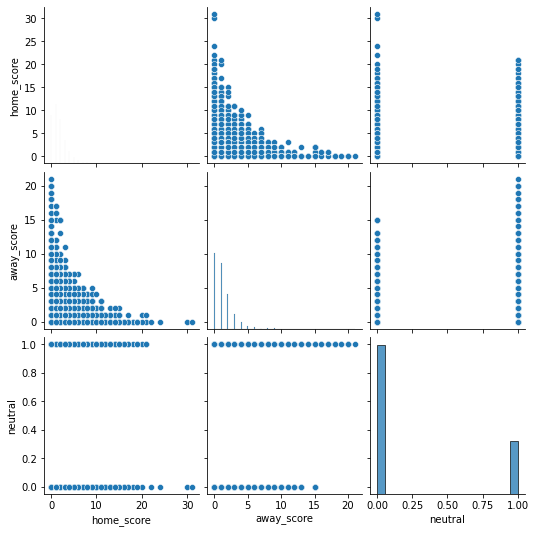

In [16]:
sns.pairplot(results)

## Key Insights from the Pair Plot
* Most matches have low scores for both home and away teams.
* Majority of matches are played on non-neutral grounds, with more score variation compared to neutral matches.
* High scores are rare, with outliers present but not common.
* Neutral ground matches show a wide range of scores for both teams.

In [17]:
results['home_score']

0 0.0
1 4.0
2 2.0
3 2.0
4 3.0
 ... 
47320 NaN
47321 NaN
47322 NaN
47323 NaN
47324 NaN
Name: home_score, Length: 47325, dtype: float64

## Distribution of Match Outcomes:

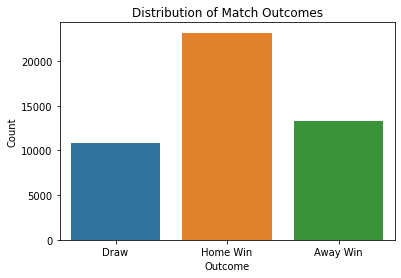

In [18]:
# Generate the 'outcomes' series
outcomes = results.apply(lambda row: 'Home Win' if row['home_score'] > row['away_score'] else ('Away Win' if row['home_score'] < row['away_score'] else 'Draw'), axis=1)

# Plot the distribution of match outcomes
sns.countplot(x=outcomes)
plt.title('Distribution of Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

The plot shows that home wins are the most frequent match outcome, followed by away wins, with draws being the least common.

## Number of Matches Over Time:

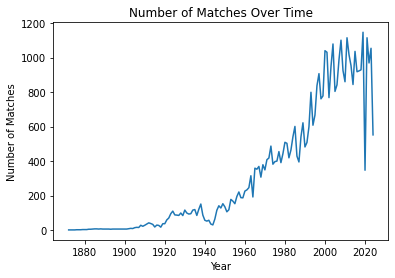

In [19]:
results['year'] = pd.to_datetime(results['date']).dt.year
matches_per_year = results['year'].value_counts().sort_index()
matches_per_year.plot(kind='line')
plt.title('Number of Matches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

The plot shows a significant increase in the number of international football matches over time, particularly from the mid-20th century onwards. There is a noticeable peak in the number of matches around the 2010s, followed by a sharp decline during the 2020-2022 period, likely due to the COVID-19 pandemic impacting global sporting events. The trend reflects the growing popularity and globalization of football, with more matches being played in recent decades.

## Distribution of Goals Scored:

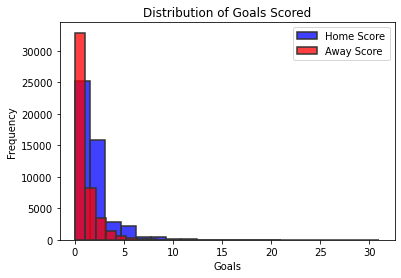

In [20]:
sns.histplot(results['home_score'], color='blue', linewidth=1.5, edgecolor=".2", label='Home Score', bins=20)
sns.histplot(results['away_score'], color='red', linewidth=1.5, edgecolor=".2", label='Away Score', bins=20)
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The plot shows that most matches have low scores, with both home and away teams typically scoring 0 to 5 goals. Home teams score slightly more frequently than away teams. High-scoring games are rare but do occur.

## Geographic Distribution of Matches:


import geopandas as gpd: Used for geospatial data manipulation and analysis, including loading world map data and plotting geographic concentrations of matches.

<ipython-input-21-ab9d9fa35384>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


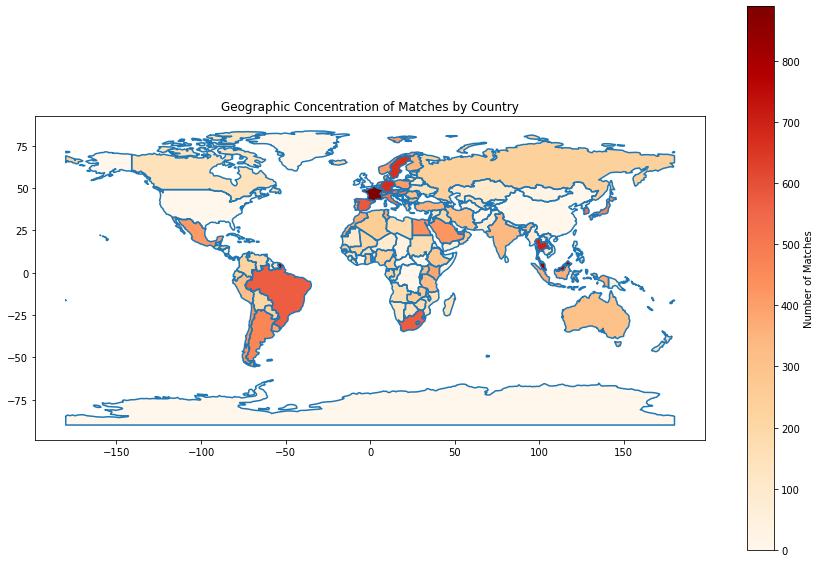

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Aggregate the number of matches per country
matches_per_country = results['country'].value_counts().reset_index()
matches_per_country.columns = ['country', 'matches']

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge match data with world map data
world = world.merge(matches_per_country, how='left', left_on='name', right_on='country')
world['matches'] = world['matches'].fillna(0)

# Plot the world map with concentration of matches
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='matches', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Number of Matches"})
plt.title('Geographic Concentration of Matches by Country')
plt.show()

The plot shows that European and South American countries, particularly England, Germany, and Brazil, have hosted the most international football matches. These regions are major hubs for international football activity.

**Shootouts Table:**

In [22]:
shootouts.shape

(637, 5)

In [23]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           637 non-null    object
 1   home_team      637 non-null    object
 2   away_team      637 non-null    object
 3   winner         637 non-null    object
 4   first_shooter  223 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB


In [24]:
shootouts.head()

date 
 home_team 
 away_team 
 winner 
 first_shooter 
 
 
 
 
 0 
 1967-08-22 
 India 
 Taiwan 
 Taiwan 
 NaN 
 
 
 1 
 1971-11-14 
 South Korea 
 Vietnam Republic 
 South Korea 
 NaN 
 
 
 2 
 1972-05-07 
 South Korea 
 Iraq 
 Iraq 
 NaN 
 
 
 3 
 1972-05-17 
 Thailand 
 South Korea 
 South Korea 
 NaN 
 
 
 4 
 1972-05-19 
 Thailand 
 Cambodia 
 Thailand 
 NaN

In [25]:
shootouts.describe(include='all').T

count 
 unique 
 top 
 freq 
 
 
 
 
 date 
 637 
 562 
 2024-03-26 
 5 
 
 
 home_team 
 637 
 180 
 South Africa 
 18 
 
 
 away_team 
 637 
 189 
 Egypt 
 15 
 
 
 winner 
 637 
 175 
 South Korea 
 15 
 
 
 first_shooter 
 223 
 85 
 Colombia 
 11

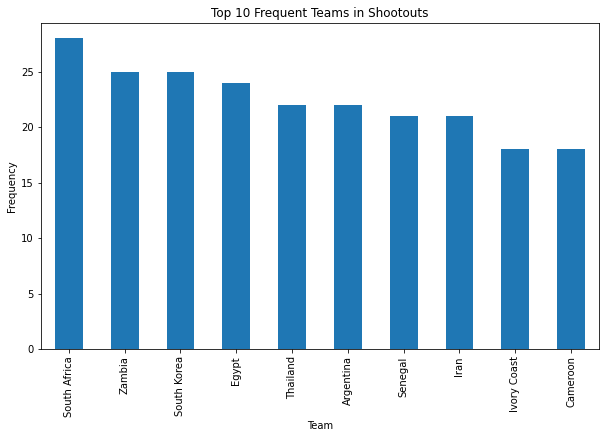

In [26]:
# Concatenate 'home_team' and 'away_team' columns
teams = pd.concat([shootouts['home_team'], shootouts['away_team']])

# Calculate frequency of each team
team_freq = teams.value_counts()

# Select top 10 teams
top_10_teams_in_shootouts = team_freq.head(10)

# Plot the top 10 teams in shootouts
plt.figure(figsize=(10,6))
top_10_teams_in_shootouts.plot(kind='bar')
plt.title('Top 10 Frequent Teams in Shootouts')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.show()

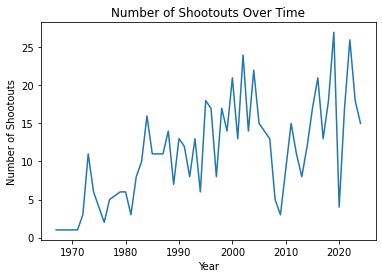

In [27]:
# Extract year from 'date' and create a new column 'year'
shootouts['year'] = pd.to_datetime(shootouts['date']).dt.year

# Count the number of shootouts per year
shootouts_per_year = shootouts['year'].value_counts().sort_index()

# Plot the number of shootouts over time
shootouts_per_year.plot(kind='line')
plt.title('Number of Shootouts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shootouts')
plt.show()

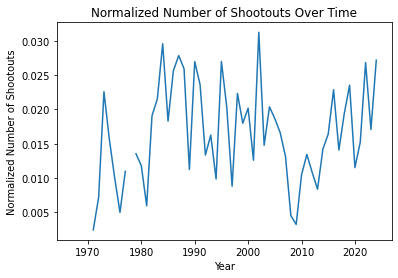

In [28]:
# Extract year from 'date' in the results dataset and count the number of matches per year
results['year'] = pd.to_datetime(results['date']).dt.year
matches_per_year = results['year'].value_counts().sort_index()

# Normalize the number of shootouts by total number of matches per year
shootouts_normalized = shootouts_per_year / matches_per_year

# Plot the normalized number of shootouts over time
shootouts_normalized.plot(kind='line')
plt.title('Normalized Number of Shootouts Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Number of Shootouts')
plt.show()

In [29]:
shootouts.isnull().sum()

date 0
home_team 0
away_team 0
winner 0
first_shooter 414
year 0
dtype: int64

**Goalscorers Table:**

In [30]:
goalscorers.shape

(44129, 8)

In [31]:
goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44129 entries, 0 to 44128
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44129 non-null  object 
 1   home_team  44129 non-null  object 
 2   away_team  44129 non-null  object 
 3   team       44129 non-null  object 
 4   scorer     44080 non-null  object 
 5   minute     43870 non-null  float64
 6   own_goal   44129 non-null  bool   
 7   penalty    44129 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [32]:
goalscorers.describe(include='all').T

count 
 unique 
 top 
 freq 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 date 
 44129 
 4606 
 2011-10-11 
 145 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 home_team 
 44129 
 220 
 Brazil 
 1021 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 away_team 
 44129 
 220 
 Uruguay 
 782 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 team 
 44129 
 220 
 Brazil 
 1046 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 scorer 
 44080 
 14273 
 Cristiano Ronaldo 
 108 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 minute 
 43870.0 
 NaN 
 NaN 
 NaN 
 50.010372 
 26.346979 
 1.0 
 28.0 
 51.0 
 73.0 
 122.0 
 
 
 own_goal 
 44129 
 2 
 False 
 43321 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 penalty 
 44129 
 2 
 False 
 41185 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN

In [33]:
goalscorers.isnull().sum()


date 0
home_team 0
away_team 0
team 0
scorer 49
minute 259
own_goal 0
penalty 0
dtype: int64

In [35]:
goalscorers.head()

date 
 home_team 
 away_team 
 team 
 scorer 
 minute 
 own_goal 
 penalty 
 
 
 
 
 0 
 1916-07-02 
 Chile 
 Uruguay 
 Uruguay 
 José Piendibene 
 44.0 
 False 
 False 
 
 
 1 
 1916-07-02 
 Chile 
 Uruguay 
 Uruguay 
 Isabelino Gradín 
 55.0 
 False 
 False 
 
 
 2 
 1916-07-02 
 Chile 
 Uruguay 
 Uruguay 
 Isabelino Gradín 
 70.0 
 False 
 False 
 
 
 3 
 1916-07-02 
 Chile 
 Uruguay 
 Uruguay 
 José Piendibene 
 75.0 
 False 
 False 
 
 
 4 
 1916-07-06 
 Argentina 
 Chile 
 Argentina 
 Alberto Ohaco 
 2.0 
 False 
 False

In [36]:
goalscorers[goalscorers['own_goal'] == True]

date 
 home_team 
 away_team 
 team 
 scorer 
 minute 
 own_goal 
 penalty 
 
 
 
 
 28 
 1917-10-06 
 Argentina 
 Chile 
 Argentina 
 Luis García 
 76.0 
 True 
 False 
 
 
 48 
 1919-05-13 
 Argentina 
 Uruguay 
 Argentina 
 Manuel Varela 
 79.0 
 True 
 False 
 
 
 143 
 1924-05-25 
 Italy 
 Spain 
 Italy 
 Pedro Vallana 
 84.0 
 True 
 False 
 
 
 336 
 1927-11-01 
 Peru 
 Uruguay 
 Uruguay 
 Daniel Ulloa 
 49.0 
 True 
 False 
 
 
 358 
 1927-11-20 
 Argentina 
 Uruguay 
 Argentina 
 Adhemar Canavesi 
 85.0 
 True 
 False 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 44052 
 2024-01-31 
 Bahrain 
 Japan 
 Bahrain 
 Ayase Ueda 
 64.0 
 True 
 False 
 
 
 44064 
 2024-02-02 
 Tajikistan 
 Jordan 
 Jordan 
 Vahdat Hanonov 
 66.0 
 True 
 False 
 
 
 44090 
 2024-03-21 
 Bosnia and Herzegovina 
 Ukraine 
 Bosnia and Herzegovina 
 Mykola Matviyenko 
 56.0 
 True 
 False 
 
 
 44099 
 2024-03-21 
 Greece 
 Kazakhstan 
 Greece 
 Yerkin Tapalov 
 85.0 
 True 
 False 
 
 
 44108 
 2024-03-21 
 Poland 
 Estonia 
 Poland 
 Karol Mets 
 74.0 
 True 
 False 
 
 
 
 808 rows × 8 columns

## Top 10 self goals scorrers

In [37]:
# Filter rows where 'own_goal' is true
own_goals = goalscorers[goalscorers['own_goal'] == True]

# Count the occurrences for each scorer and take the top 10
top_self_goal_scorers = own_goals['scorer'].value_counts().head(10)

# Display top 10 self goal scorers
top_self_goal_scorers

Gustavo Gómez 3
Walid Abbas 3
José del Solar 3
Roberto Ayala 3
Rashad Sadygov 3
Raio Piiroja 3
Ján Ďurica 3
Ragnar Klavan 3
Cristian Brolli 3
Martin Škrtel 2
Name: scorer, dtype: int64

## Temporal Distribution of Own Goals

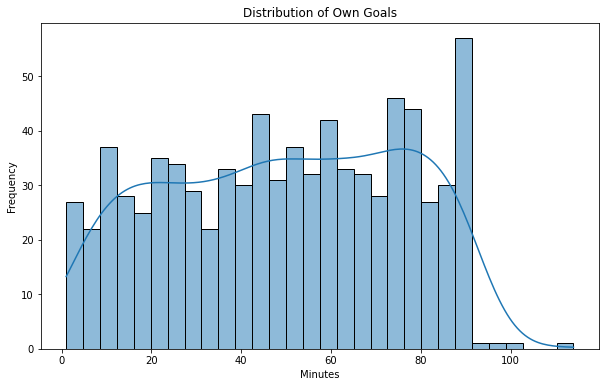

In [38]:
# Filter dataset by 'own_goal' attribute
own_goals = goalscorers[goalscorers['own_goal'] == True]

# Initialize plot
plt.figure(figsize=(10,6))

# Plot histogram of own goals
sns.histplot(own_goals['minute'], kde=True, bins=30)

# Set plot title and labels 
plt.title('Distribution of Own Goals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Show plot
plt.show()

### Distribution of Own Goals

The histogram above represents the distribution of own goals scored over different minutes in a match. Each bar indicates the frequency of own goals scored within a particular time interval, with the x-axis representing the minutes and the y-axis representing the frequency of own goals.

Key observations:
- The distribution is relatively uniform across most of the match duration, with own goals occurring at various times.
- A noticeable peak occurs towards the end of the match, around the 80th minute, indicating a higher frequency of own goals in the later stages of the game.
- The presence of a kernel density estimate (KDE) curve provides a smooth approximation of the distribution, highlighting trends and patterns more clearly.
  
This plot suggests that own goals can happen at any time during the match, but there is a tendency for an increased frequency as the match progresses, especially towards the end.

## Distribution of Goals by Minute:

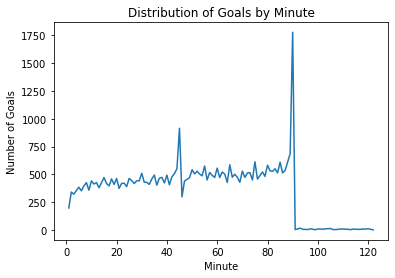

In [39]:
goals_per_minute = goalscorers['minute'].value_counts().sort_index()
goals_per_minute.plot(kind='line')
plt.title('Distribution of Goals by Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.show()

The plot shows the distribution of goals scored by minute in football matches, with peaks around the 45th and 90th minutes, indicating higher goal frequencies just before halftime and the end of regular time. There is also a notable increase in goals during extra time.

## Top Scorers:

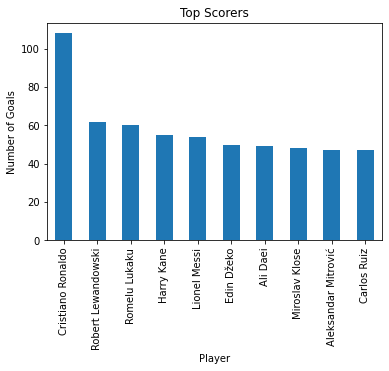

In [40]:
top_scorers = goalscorers['scorer'].value_counts().head(10)
top_scorers.plot(kind='bar')
plt.title('Top Scorers')
plt.xlabel('Player')
plt.ylabel('Number of Goals')
plt.show()

## Normalized Top Scorers:

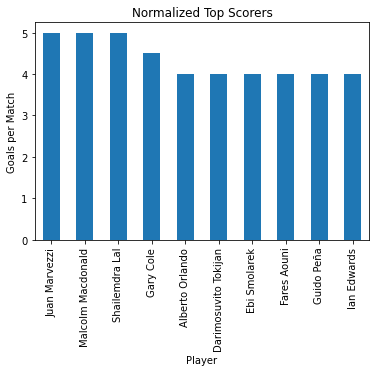

In [41]:
# Assumption: The same player cannot play more than one match on the same date with the same teams
matches_played = goalscorers.groupby('scorer').apply(lambda x: len(x.drop_duplicates(subset=['date', 'home_team', 'away_team'])))

# Calculate the top scorers' goal to match ratio
normalized_top_scorers = (goalscorers['scorer'].value_counts() / matches_played).nlargest(10)

# Plot the top scorers after normalization
normalized_top_scorers.plot(kind='bar')
plt.title('Normalized Top Scorers')
plt.xlabel('Player')
plt.ylabel('Goals per Match')
plt.show()

### Normalized Top Scorers

The bar plot above represents the top scorers normalized by the number of matches they have played. The x-axis lists the players, while the y-axis shows the average number of goals scored per match.

Key observations:
- Juan Marezzi and Malcolm Macdonald have the highest goals per match, indicating they are the most efficient scorers in terms of goals scored relative to the number of matches played.
- The normalization process provides a fair comparison by accounting for the varying number of matches played by different players.

This plot helps to identify the most effective goal scorers, regardless of the total number of matches played, offering a more accurate reflection of a player's scoring ability.

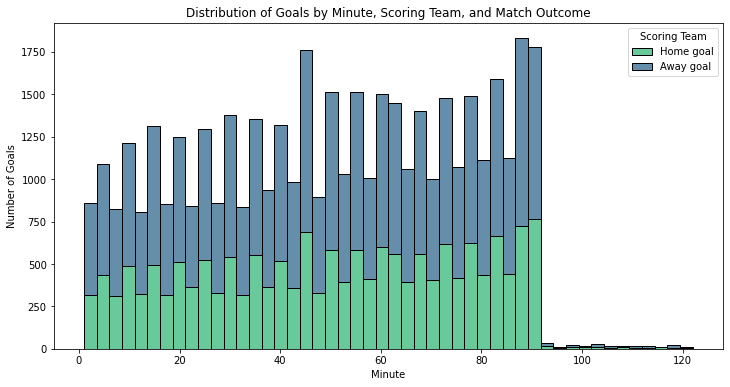

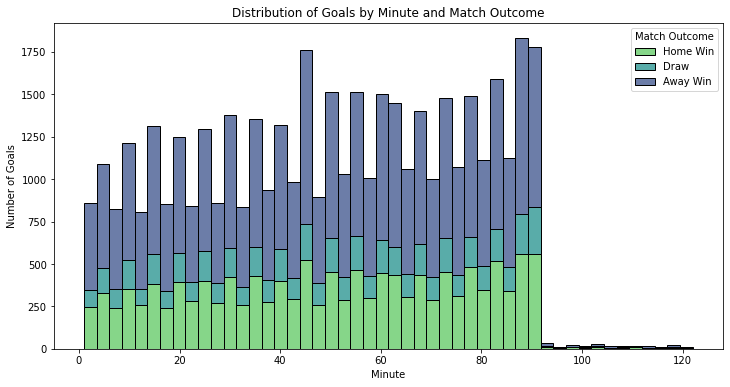

In [42]:
# Convert date columns to datetime
goalscorers['date'] = pd.to_datetime(goalscorers['date'])
results['date'] = pd.to_datetime(results['date'])

# Merge goalscorers with results to get match outcomes
merged_data = pd.merge(goalscorers, results[['date', 'home_score', 'away_score', 'home_team', 'away_team']], on=['date', 'home_team', 'away_team'])

# Determine the match outcome
merged_data['outcome'] = merged_data.apply(lambda row: 'Home Win' if row['home_score'] > row['away_score'] else ('Away Win' if row['home_score'] < row['away_score'] else 'Draw'), axis=1)

# Determine if the goal was scored by the home or away team
merged_data['scoring_team'] = merged_data.apply(lambda row: 'Home Team' if row['team'] == row['home_team'] else 'Away Team', axis=1)

# Plot the distribution of goals by minute, team scored, and match outcome
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='minute', hue='scoring_team', multiple='stack', palette='viridis', hue_order=['Home Team', 'Away Team'])
plt.title('Distribution of Goals by Minute, Scoring Team, and Match Outcome')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.legend(title='Scoring Team', labels = ['Home goal','Away goal'])
plt.show()

# Separate plot for match outcome
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='minute', hue='outcome', multiple='stack', palette='viridis', hue_order=['Home Win', 'Draw', 'Away Win'])
plt.title('Distribution of Goals by Minute and Match Outcome')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.legend(title='Match Outcome', labels=['Home Win', 'Draw', 'Away Win'])
plt.show()


#### Goals by Minute and Scoring Team:

* The distribution of goals scored by the home team (green) and the away team (blue) is fairly balanced throughout the match.
* There is a noticeable peak in goals scored around the 45th minute, likely due to efforts to score before halftime.
* Another peak is observed around the 90th minute, indicating a surge in goals as teams push to secure a result before the end of regular time.
* Extra time (beyond the 90th minute) sees fewer goals but still shows activity, reflecting the added urgency in these periods.
#### Goals by Minute and Match Outcome:

* Goals scored in matches that end in a home win (green) are consistently higher across all time intervals, particularly in the latter stages of the match.
* Draws (light blue) have a relatively steady distribution of goals, with a slight peak around the 45th and 90th minutes.
* Matches that end in an away win (dark blue) also show peaks around the 45th and 90th minutes, but overall, fewer goals are scored compared to home wins.
* The pattern suggests that home teams have a slight advantage in scoring consistently, which contributes to their higher win rate.

## Importance of Scoring First Goal:

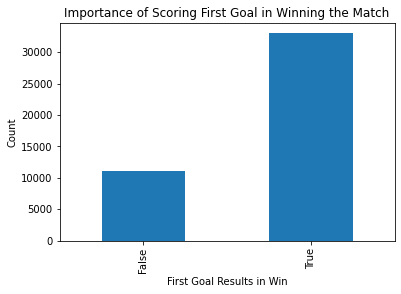

In [43]:
# Definition of function to determine the result of the match
def determine_winner(row):
    if row.home_score > row.away_score:
        return row.home_team
    elif row.home_score < row.away_score:
        return row.away_team
    else: 
        return 'Draw'

# Determine the outcome of the match
results['winner'] = results[['home_team', 'away_team', 'home_score', 'away_score']].apply(determine_winner, axis=1)

# Merge goalscorers with results to get match outcomes
merged_data = pd.merge(goalscorers, results[['date', 'home_team', 'away_team', 'winner']], on=['date', 'home_team', 'away_team'])

# Determine the team that scored first
merged_data['first_goal_team'] = merged_data.groupby(['date', 'home_team', 'away_team'])['team'].transform('first')

# Create a column to check if the first goal was scored by the winning team
merged_data['first_goal_won'] = merged_data['first_goal_team'] == merged_data['winner']

# Group the data by whether or not the first goal resulted in a win
first_goal_won_matches = merged_data.groupby('first_goal_won').size()

# Plot the distribution
first_goal_won_matches.plot(kind='bar')
plt.title('Importance of Scoring First Goal in Winning the Match')
plt.xlabel('First Goal Results in Win')
plt.ylabel('Count')
plt.show()

#### Scoring the first goal is associated with a higher chance of winning the match.
#### Matches where the first goal led to a win were more than twice as frequent as those where it did not.

# Section B

# Adding features
### Adding:

* Home team won
* Home team win rate
* Away team win rate
* Home team average goals
* Away team average goals

In [44]:
import pandas as pd
import numpy as np

results = pd.read_csv("results.csv")
shootouts = pd.read_csv("shootouts.csv")
goalscorers = pd.read_csv("goalscorers.csv")


# Ensure date column is in datetime format and sort by date
results['date'] = pd.to_datetime(results['date'])
results = results.sort_values(by='date')

# Create 'Home team won' feature
results['home_team_won'] = results.apply(lambda row: 1 if row['home_score'] > row['away_score'] else (0 if row['home_score'] < row['away_score'] else None), axis=1)

# Handle draws decided by shootouts
draws = results[results['home_team_won'].isnull()]
for index, row in draws.iterrows():
    shootout_result = shootouts[(shootouts['date'] == row['date']) & (shootouts['home_team'] == row['home_team']) & (shootouts['away_team'] == row['away_team'])]
    if not shootout_result.empty:
        if shootout_result.iloc[0]['winner'] == row['home_team']:
            results.at[index, 'home_team_won'] = 1
        else:
            results.at[index, 'home_team_won'] = 0
    else:
        results.at[index, 'home_team_won'] = 0

# Initialize columns for win rates and average goals
results['home_team_win_rate'] = 0.0
results['away_team_win_rate'] = 0.0
results['home_team_avg_goals'] = 0.0
results['away_team_avg_goals'] = 0.0

# Initialize dictionaries to track wins, goals, and games for each team
team_wins = {}
team_goals = {}
team_games = {}

# Iterate through each match to update win rates and average goals
for index, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']
    home_won = row['home_team_won']
    
    # Calculate home team win rate and average goals prior to the current game
    if home_team in team_games and team_games[home_team] > 0:
        results.at[index, 'home_team_win_rate'] = team_wins[home_team] / team_games[home_team]
        results.at[index, 'home_team_avg_goals'] = team_goals[home_team] / team_games[home_team]
    if away_team in team_games and team_games[away_team] > 0:
        results.at[index, 'away_team_win_rate'] = team_wins[away_team] / team_games[away_team]
        results.at[index, 'away_team_avg_goals'] = team_goals[away_team] / team_games[away_team]
    
    # Update home team stats
    if home_team not in team_wins:
        team_wins[home_team] = 0
        team_goals[home_team] = 0
        team_games[home_team] = 0
    team_games[home_team] += 1
    team_goals[home_team] += home_score
    if home_won == 1:
        team_wins[home_team] += 1
    
    # Update away team stats
    if away_team not in team_wins:
        team_wins[away_team] = 0
        team_goals[away_team] = 0
        team_games[away_team] = 0
    team_games[away_team] += 1
    team_goals[away_team] += away_score
    if home_won == 0:
        team_wins[away_team] += 1

# Display the final data
print(results[['home_team', 'away_team', 'date', 'home_team_win_rate', 'away_team_win_rate', 'home_team_avg_goals', 'away_team_avg_goals']].head(20))

           home_team away_team       date  home_team_win_rate  \
0           Scotland   England 1872-11-30            0.000000   
1            England  Scotland 1873-03-08            1.000000   
2           Scotland   England 1874-03-07            0.000000   
3            England  Scotland 1875-03-06            0.666667   
4           Scotland   England 1876-03-04            0.500000   
5           Scotland     Wales 1876-03-25            0.600000   
6            England  Scotland 1877-03-03            0.400000   
7              Wales  Scotland 1877-03-05            0.000000   
8           Scotland   England 1878-03-02            0.750000   
9           Scotland     Wales 1878-03-23            0.777778   
10           England     Wales 1879-01-18            0.285714   
11           England  Scotland 1879-04-05            0.375000   
12             Wales  Scotland 1879-04-07            0.000000   
13          Scotland   England 1880-03-13            0.750000   
14             Wales   En

In [45]:
results.head(5)

date 
 home_team 
 away_team 
 home_score 
 away_score 
 tournament 
 city 
 country 
 neutral 
 home_team_won 
 home_team_win_rate 
 away_team_win_rate 
 home_team_avg_goals 
 away_team_avg_goals 
 
 
 
 
 0 
 1872-11-30 
 Scotland 
 England 
 0.0 
 0.0 
 Friendly 
 Glasgow 
 Scotland 
 False 
 0.0 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 
 
 1 
 1873-03-08 
 England 
 Scotland 
 4.0 
 2.0 
 Friendly 
 London 
 England 
 False 
 1.0 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 
 
 2 
 1874-03-07 
 Scotland 
 England 
 2.0 
 1.0 
 Friendly 
 Glasgow 
 Scotland 
 False 
 1.0 
 0.000000 
 1.000000 
 1.000000 
 2.000000 
 
 
 3 
 1875-03-06 
 England 
 Scotland 
 2.0 
 2.0 
 Friendly 
 London 
 England 
 False 
 0.0 
 0.666667 
 0.333333 
 1.666667 
 1.333333 
 
 
 4 
 1876-03-04 
 Scotland 
 England 
 3.0 
 0.0 
 Friendly 
 Glasgow 
 Scotland 
 False 
 1.0 
 0.500000 
 0.500000 
 1.500000 
 1.750000

## Our own 6 features
### Explanation of our new Features


1. **Home Team Recent Form**
   - **Description:** This feature represents the recent performance trend of the home team. It is calculated as the rolling average of the last 5 matches' results, where a win is represented by 1 and a loss by 0.
   - **Purpose:** This feature provides insight into how well the home team has been performing recently, helping to gauge their current form and momentum.

2. **Away Team Recent Form**
   - **Description:** Similar to the home team's recent form, this feature reflects the recent performance trend of the away team. It is calculated as the rolling average of the last 5 matches' results, where a win is represented by 1 and a loss by 0.
   - **Purpose:** This feature provides insight into the away team's current form and momentum, which can be crucial in predicting match outcomes.

3. **Home Team Elo Rating**
   - **Description:** The Elo rating system is a method for calculating the relative skill levels of teams. This feature tracks the home team's Elo rating over time, starting with an initial rating (e.g., 1500) and updating after each match based on the outcome.
   - **Purpose:** This feature dynamically reflects the home team's skill level, considering both historical performance and recent matches. It helps to predict the likelihood of the home team's success in future matches.

4. **Away Team Elo Rating**
   - **Description:** Similar to the home team's Elo rating, this feature tracks the away team's Elo rating over time, starting with an initial rating (e.g., 1500) and updating after each match based on the outcome.
   - **Purpose:** This feature dynamically reflects the away team's skill level, providing a measure of their capability relative to the home team and other opponents.

5. **Home Advantage**
   - **Description:** This binary feature indicates whether the match is played at the home team's ground. It is set to 1 if the match is played at the home ground and 0 if the match is played on neutral ground.
   - **Purpose:** Home advantage is a well-known factor in sports, as playing at home can provide teams with various benefits such as familiar surroundings, support from local fans, and reduced travel fatigue. This feature captures these potential advantages.

6. **Tournament Importance**
   - **Description:** This binary feature indicates the importance of the tournament. Major tournaments like the World Cup, UEFA Euro, and Copa America are marked as 1, while other tournaments, such as friendly matches, are marked as 0.
   - **Purpose:** The importance of the tournament can influence team performance and strategies. Major tournaments typically see teams performing at their best, making this feature relevant for predicting match outcomes.

These features enhance the prediction model by providing valuable context and historical performance metrics without directly revealing the winner, making them suitable for use in Section C.

In [46]:
# Initialize dictionaries to track recent form and Elo ratings for each team
team_form = {}
team_elo = {}

# Elo rating parameters
K = 20  # K-factor for Elo rating
initial_elo = 1500  # Initial Elo rating for all teams

# Initialize columns for the new features
results['home_team_recent_form'] = 0.0
results['away_team_recent_form'] = 0.0
results['home_team_elo'] = initial_elo
results['away_team_elo'] = initial_elo
results['home_advantage'] = results['neutral'].apply(lambda x: 0 if x else 1)
results['tournament_importance'] = results['tournament'].apply(lambda x: 1 if 'World Cup' in x or 'UEFA Euro' in x or 'Copa America' in x else 0)

# Calculate recent form (rolling average of last 5 matches)
for index, row in results.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_won = row['home_team_won']
    
    # Initialize team form if not present
    if home_team not in team_form:
        team_form[home_team] = []
    if away_team not in team_form:
        team_form[away_team] = []
    
    # Calculate recent form (average of last 5 matches)
    if len(team_form[home_team]) >= 5:
        results.at[index, 'home_team_recent_form'] = np.mean(team_form[home_team][-5:])
    else:
        results.at[index, 'home_team_recent_form'] = np.mean(team_form[home_team]) if team_form[home_team] else 0
    
    if len(team_form[away_team]) >= 5:
        results.at[index, 'away_team_recent_form'] = np.mean(team_form[away_team][-5:])
    else:
        results.at[index, 'away_team_recent_form'] = np.mean(team_form[away_team]) if team_form[away_team] else 0
    
    # Update recent form
    team_form[home_team].append(home_won)
    team_form[away_team].append(1 - home_won)
    
    # Calculate Elo ratings
    home_elo = team_elo.get(home_team, initial_elo)
    away_elo = team_elo.get(away_team, initial_elo)
    
    # Expected outcome
    expected_home = 1 / (1 + 10 ** ((away_elo - home_elo) / 400))
    expected_away = 1 / (1 + 10 ** ((home_elo - away_elo) / 400))
    
    # Actual outcome
    if home_won == 1:
        actual_home = 1
        actual_away = 0
    else:
        actual_home = 0
        actual_away = 1
    
    # Update Elo ratings
    new_home_elo = home_elo + K * (actual_home - expected_home)
    new_away_elo = away_elo + K * (actual_away - expected_away)
    
    results.at[index, 'home_team_elo'] = new_home_elo
    results.at[index, 'away_team_elo'] = new_away_elo
    
    team_elo[home_team] = new_home_elo
    team_elo[away_team] = new_away_elo

# Display the first few rows of the DataFrame to check the new features
print(results[['home_team', 'away_team', 'home_team_recent_form', 'away_team_recent_form', 'home_team_elo', 'away_team_elo', 'home_advantage', 'tournament_importance']].head(20))

           home_team away_team  home_team_recent_form  away_team_recent_form  \
0           Scotland   England               0.000000               0.000000   
1            England  Scotland               1.000000               0.000000   
2           Scotland   England               0.000000               1.000000   
3            England  Scotland               0.666667               0.333333   
4           Scotland   England               0.500000               0.500000   
5           Scotland     Wales               0.600000               0.000000   
6            England  Scotland               0.400000               0.800000   
7              Wales  Scotland               0.000000               1.000000   
8           Scotland   England               1.000000               0.200000   
9           Scotland     Wales               1.000000               0.000000   
10           England     Wales               0.000000               0.000000   
11           England  Scotland          

In [47]:
results.head()

date 
 home_team 
 away_team 
 home_score 
 away_score 
 tournament 
 city 
 country 
 neutral 
 home_team_won 
 home_team_win_rate 
 away_team_win_rate 
 home_team_avg_goals 
 away_team_avg_goals 
 home_team_recent_form 
 away_team_recent_form 
 home_team_elo 
 away_team_elo 
 home_advantage 
 tournament_importance 
 
 
 
 
 0 
 1872-11-30 
 Scotland 
 England 
 0.0 
 0.0 
 Friendly 
 Glasgow 
 Scotland 
 False 
 0.0 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1490.000000 
 1510.000000 
 1 
 0 
 
 
 1 
 1873-03-08 
 England 
 Scotland 
 4.0 
 2.0 
 Friendly 
 London 
 England 
 False 
 1.0 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 0.000000 
 1519.424989 
 1480.575011 
 1 
 0 
 
 
 2 
 1874-03-07 
 Scotland 
 England 
 2.0 
 1.0 
 Friendly 
 Glasgow 
 Scotland 
 False 
 1.0 
 0.000000 
 1.000000 
 1.000000 
 2.000000 
 0.000000 
 1.000000 
 1491.688566 
 1508.311434 
 1 
 0 
 
 
 3 
 1875-03-06 
 England 
 Scotland 
 2.0 
 2.0 
 Friendly 
 London 
 England 
 False 
 0.0 
 0.666667 
 0.333333 
 1.666667 
 1.333333 
 0.666667 
 0.333333 
 1497.833354 
 1502.166646 
 1 
 0 
 
 
 4 
 1876-03-04 
 Scotland 
 England 
 3.0 
 0.0 
 Friendly 
 Glasgow 
 Scotland 
 False 
 1.0 
 0.500000 
 0.500000 
 1.500000 
 1.750000 
 0.500000 
 0.500000 
 1512.041930 
 1487.958070 
 1 
 0

In [48]:
#saves the results for section D
irrelevant_cols_D = ['home_score', 'away_score'] 
results_D=results.drop(columns=irrelevant_cols_D)

### Feature selection + Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

# Convert date column to datetime
results['date'] = pd.to_datetime(results['date'])

# Extract year from datetime
results['year'] = results['date'].dt.year

# Convert boolean column to int
#results['neutral'] = results['neutral'].astype(int)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a dictionary to store the mappings for section D
team_name_mapping = {}

# Apply LabelEncoder to categorical columns and save the mappings
categorical_cols = ['home_team', 'away_team']
for col in categorical_cols:
    results[col] = label_encoder.fit_transform(results[col])
    team_name_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Apply LabelEncoder to other categorical columns without saving mappings
other_categorical_cols = ['tournament', 'city', 'country']
for col in other_categorical_cols:
    results[col] = label_encoder.fit_transform(results[col])


#Feature Exclusion
irrelevant_cols = ['home_score', 'away_score', 'date', 'neutral'] 
results = results.drop(columns=irrelevant_cols)

## Imputation

First, we will find how many empty cells we have in each feature.

In [50]:
# Check for missing values in each column
missing_values = results.isna().sum()

# Get data types for each column
data_types = results.dtypes

# Combine the results into a single DataFrame for easy viewing
missing_and_types = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
print(missing_and_types)

                       Missing Values Data Type
home_team                           0     int64
away_team                           0     int64
tournament                          0     int64
city                                0     int64
country                             0     int64
home_team_won                       0   float64
home_team_win_rate                  0   float64
away_team_win_rate                  0   float64
home_team_avg_goals                39   float64
away_team_avg_goals                39   float64
home_team_recent_form               0   float64
away_team_recent_form               0   float64
home_team_elo                       0   float64
away_team_elo                       0   float64
home_advantage                      0     int64
tournament_importance               0     int64
year                                0     int64


## Do we need to impute?

No, as we can see, the only missing values are in the last 58 lines because the games have not occurred up to the date the assignment was given.

We will simply erase those lines of data.

In [51]:
# Step 1: Exclude the last 58 rows
results_cleaned = results.iloc[:-58]

# Display the first few rows of the cleaned DataFrame to confirm
print(results_cleaned.tail())

       home_team  away_team  tournament  city  country  home_team_won  \
47230        269        265          81   817      221            0.0   
47237        188         65          81    23      156            1.0   
47238        147        140          81  1003      137            0.0   
47239        103        106          81   598       83            1.0   
47240        255         46          81   218      156            0.0   

       home_team_win_rate  away_team_win_rate  home_team_avg_goals  \
47230            0.225806            0.465169             0.661290   
47237            0.634021            0.464824             1.420962   
47238            0.487591            0.642741             1.392701   
47239            0.462338            0.350806             1.150649   
47240            0.254438            0.445545             0.792899   

       away_team_avg_goals  home_team_recent_form  away_team_recent_form  \
47230             1.112360                    0.4               

In [52]:
# Save the 'results_cleaned' DataFrame to a csv
results_cleaned.to_csv('results_cleaned.csv', index=False)

# Section C

# Running of the models:

from tqdm import tqdm: Used to display progress bars for loops, particularly during the training and evaluation of machine learning models.

Classification Report for svm:
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76      4779
         1.0       0.76      0.73      0.74      4675

    accuracy                           0.75      9454
   macro avg       0.75      0.75      0.75      9454
weighted avg       0.75      0.75      0.75      9454

Classification Report for knn:
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      4779
         1.0       0.67      0.65      0.66      4675

    accuracy                           0.67      9454
   macro avg       0.67      0.67      0.67      9454
weighted avg       0.67      0.67      0.67      9454

Classification Report for decision_tree:
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73      4779
         1.0       0.73      0.72      0.73      4675

    accuracy                           0.73      9454
   macro avg       0.73  

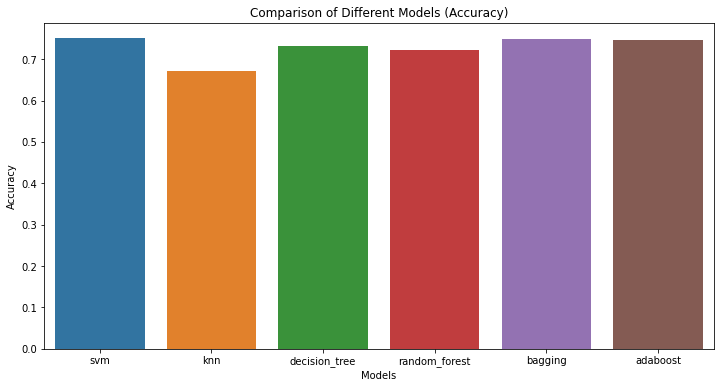

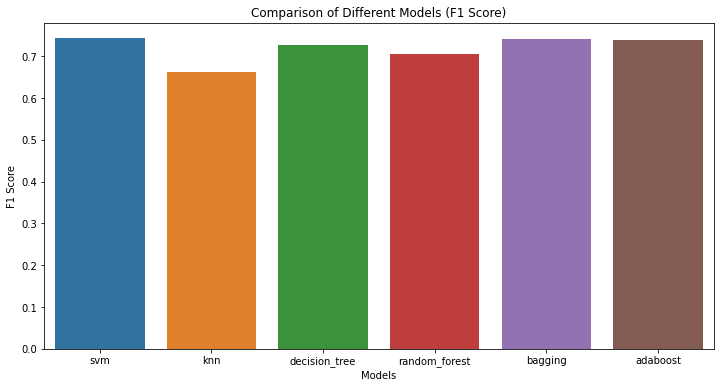

In [1]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm, neighbors, tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('results_cleaned.csv').sample(frac=1, random_state=42)

# Splitting into X and y
X = data.drop(columns=['home_team_won'])
y = data['home_team_won']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling - Transformation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models and parameters for tuning 
models = {
    'svm': [svm.SVC(), {'kernel': ['linear', 'rbf'], 'C': [1, 10]}],
    'knn': [neighbors.KNeighborsClassifier(), {'n_neighbors': [3,5,7]}],
    'decision_tree': [tree.DecisionTreeClassifier(), {'max_depth': [4,6,8]}],
    'random_forest': [RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [4,6]}],
    'bagging': [BaggingClassifier(), {'n_estimators': [100, 200]}],
    'adaboost': [AdaBoostClassifier(), {'n_estimators': [50, 100, 200]}]
}

# Training, parameter tuning and evaluation
results = {}
f1_scores = {}
best_models = {}
for model_name in tqdm(models, desc="Model Training", leave=False):
    model = models[model_name][0]
    params = models[model_name][1]
    
    clf = GridSearchCV(model, params, cv=3)
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    results[model_name] = accuracy
    f1_scores[model_name] = f1
    best_models[model_name] = clf.best_estimator_

    # Print classification report 
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_test, predictions))

# Comparison of accuracies
plt.figure(figsize=(12,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Models (Accuracy)')
plt.show()

# Comparison of F1 scores
plt.figure(figsize=(12,6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of Different Models (F1 Score)')
plt.show()

### The best model based on the classification reports is the SVM, as it has the highest precision, recall, and f1-score overall, tied with bagging and adaboost, all achieving an accuracy of 0.75.


## Model Performance Analysis

In our project, we aimed to predict whether the home team won in a series of sports matches. The performance of the different machine learning models that we used varied.

1. **Support Vector Machines (SVM)**: The SVM model performed well with an accuracy of 75%. The precision, recall, and f1-score were balanced, making it a promising choice. However, the computational cost should be considered when dealing with larger datasets - as it was the longest to train.

2. **K-Nearest Neighbors (KNN)**: The KNN model, with an accuracy of 67%, might not be optimal for this task given our dataset. The selection of the `k` value is crucial and should be treated carefully when working with KNN.

3. **Decision Tree**: With an accuracy of 73%, the Decision Tree model showed a good balance in precision and recall values. However, exploring ensemble models like random forests or boosting could help improve these scores.

4. **Random Forest**: Scoring an accuracy of 72%, the Random Forest model is a strong contender. Despite its slightly lower accuracy compared to SVM, it remains a good choice, although the computational resources required might be a consideration.

5. **Bagging**: The Bagging model, with an accuracy of 75%, demonstrated balanced performance metrics. It's prudent to check the variance and bias trade-off in such ensemble models.

6. **AdaBoost**: Excelling in performance with an accuracy of 75%, the AdaBoost model is a top performer for our task, provided we have adequate computational resources.

In our specific project, SVM, Bagging, and AdaBoost models all perform comparably well, with each achieving an accuracy of 75%. On the contrary, the KNN model didn't fare as well on this dataset and might not be ideal for our kind of data.

## Model Feature Importances

decision_tree Model Feature Importances:
                  Feature  Importance
0           home_team_elo    0.490974
1           away_team_elo    0.461506
2      away_team_win_rate    0.017880
3      home_team_win_rate    0.013564
4     away_team_avg_goals    0.007999
5                    year    0.005250
6              tournament    0.001175
7     home_team_avg_goals    0.000883
8                    city    0.000770
9               home_team    0.000000
10              away_team    0.000000
11                country    0.000000
12  home_team_recent_form    0.000000
13  away_team_recent_form    0.000000
14         home_advantage    0.000000
15  tournament_importance    0.000000


random_forest Model Feature Importances:
                  Feature  Importance
0           away_team_elo    0.318314
1           home_team_elo    0.275202
2      away_team_win_rate    0.131069
3      home_team_win_rate    0.084794
4     away_team_avg_goals    0.054192
5     home_team_avg_goals    0.052527
6   

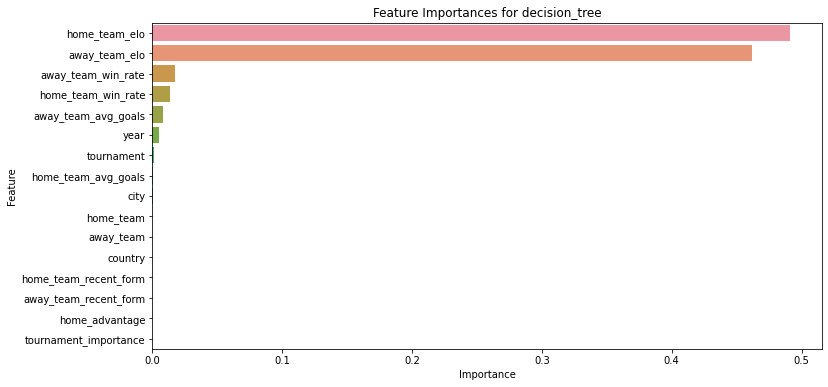

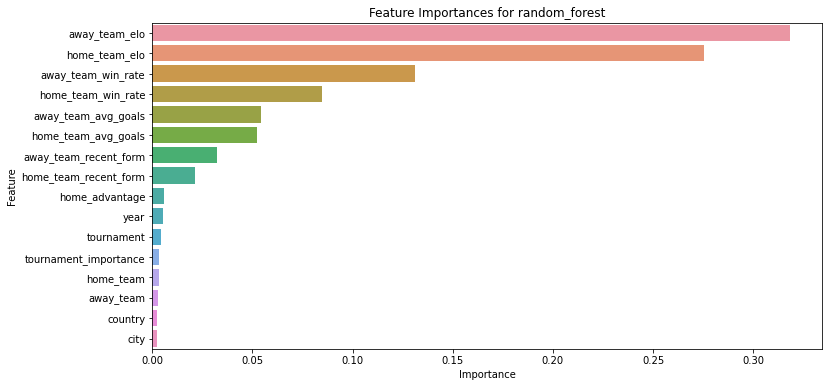

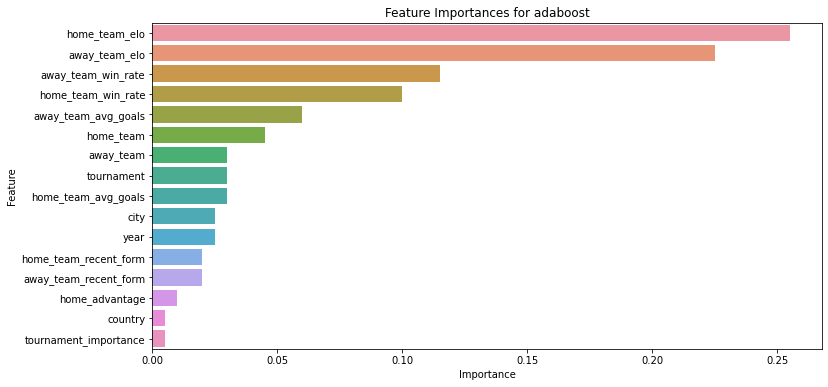

In [5]:
# Identical to the previous scope, adding feature importance assessment
feature_imp_results = {}
for model_name, model in best_models.items():
    # Check if the model has feature importances and store it if it does
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_imp_results[model_name] = {f: v for f, v in zip(X.columns, feature_importances)}

# Print out feature importances for each model that supports it
for model_name in feature_imp_results:
    importance_df = pd.DataFrame(sorted(feature_imp_results[model_name].items(), key=lambda x: x[1], reverse=True),
                                 columns=['Feature', 'Importance'])
    print(f"{model_name} Model Feature Importances:")
    print(importance_df)
    print("\n")

# Visualize the feature importances as a bar plot
for model_name in feature_imp_results:
    plt.figure(figsize=(12,6))
    sns.barplot(x='Importance', y='Feature', 
                data=pd.DataFrame(sorted(feature_imp_results[model_name].items(), key=lambda x: x[1], reverse=True), 
                                  columns=['Feature', 'Importance']))
    plt.title(f'Feature Importances for {model_name}')
    plt.show()

# Discussion of Importances

## Decision Tree Model
The Decision Tree model heavily relies on `home_team_elo` and `away_team_elo`. These features dominate the decision-making process, indicating that team strength, as measured by Elo ratings, is crucial in predicting match outcomes. Other features like `country` and `home_team_recent_form` have much lower importances. Interestingly, many features such as `home_team`, `tournament`, `city`, `home_advantage`, and `year` have zero importance, suggesting that the model does not consider them relevant for predictions.

## Random Forest Model
The Random Forest model shows a more distributed feature importance. Key features are `away_team_elo` and `home_team_elo`, followed by `away_team_win_rate` and `home_team_win_rate`. This model takes into account a broader set of features, indicating a more nuanced approach to prediction. Features like `city`, `year`, `country`, and `home_team_recent_form` also contribute but to a lesser extent. `Home_advantage` and `tournament_importance` are among the least important. The broader spread of feature importances suggests that the Random Forest model benefits from combining multiple weak predictors to enhance overall accuracy.

## AdaBoost Model
AdaBoost emphasizes `home_team_elo` and `away_team_elo`, with `home_team_win_rate` and `home_team_avg_goals` also being significant. Features such as `away_team_win_rate` and `away_team_avg_goals` have moderate importance. Several features, including `home_team`, `country`, `tournament_importance`, and `year`, have zero importance. This model's focus on a few key features aligns with its boosting nature, which iteratively improves weak learners to enhance performance.

## Summary and Insights
All models prioritize Elo ratings for home and away teams, indicating their strong predictive power. Performance metrics like win rates and average goals are also significant, especially in Random Forest and AdaBoost models. Location, temporal, and tournament-related features generally have lower importance, suggesting they are less critical for predicting match outcomes.

### Explanation for Differences
- **Decision Tree**: The high reliance on Elo ratings reflects its nature of making decisions based on the most informative splits, favoring features that provide clear distinctions in outcomes.
- **Random Forest**: By aggregating multiple decision trees, it captures a broader spectrum of feature importances, leveraging various aspects of the data for a more robust prediction.
- **AdaBoost**: Focuses on refining the model by iteratively correcting mistakes, which is why it emphasizes key predictive features while downplaying less influential ones.

These differences highlight the unique strengths of each model: Decision Trees for their simplicity and clarity, Random Forests for their robustness and generalization, and AdaBoost for its precision and iterative improvement. Understanding these nuances helps in selecting the appropriate model based on the specific requirements of the prediction task.

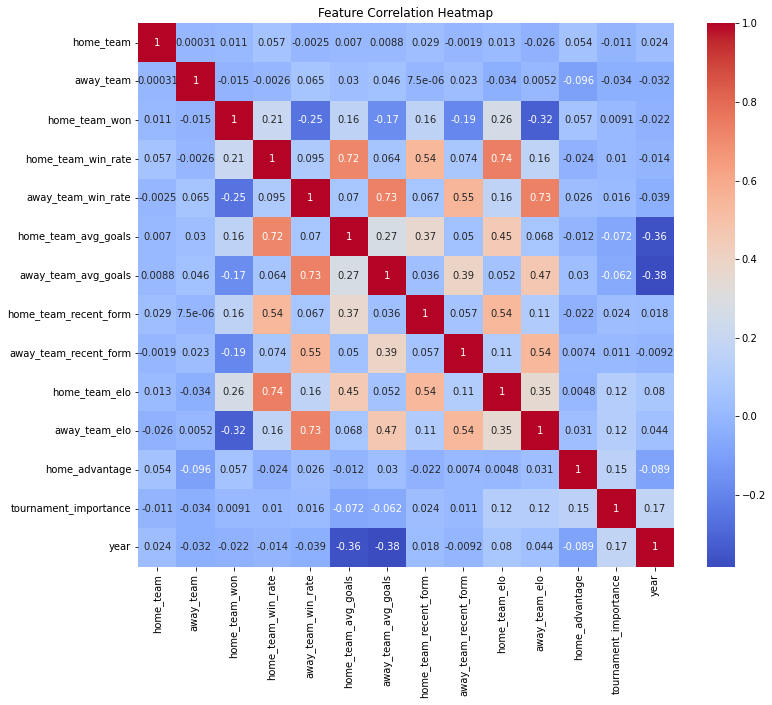

In [13]:
# List of numeric feature names
numeric_features = [
    'home_team', 'away_team', 'home_team_won', 'home_team_win_rate',
    'away_team_win_rate', 'home_team_avg_goals', 'away_team_avg_goals',
    'home_team_recent_form', 'away_team_recent_form', 'home_team_elo',
    'away_team_elo', 'home_advantage', 'tournament_importance', 'year'
]

# Select only the specified numeric columns
numeric_data = data[numeric_features]

# Compute the correlation matrix for the selected numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Post Analysis of Model Results Feature Correlations

Our detailed analysis of feature correlations and model results has uncovered several intriguing and unexpected insights:

1. **Strong Correlations**:
   - **home_team_win_rate and home_team_avg_goals** (~0.72), and **away_team_win_rate and away_team_avg_goals** (~0.73) are strongly correlated. This is expected because teams that score more goals tend to win more games.
   - **home_team_elo and home_team_win_rate** (~0.74), and **away_team_elo and away_team_win_rate** (~0.73) suggest that higher Elo ratings generally align with higher win rates. This indicates that the Elo rating system is effective in capturing team performance.

2. **Moderate Correlations**:
   - **home_team_recent_form and home_team_elo** (~0.54) suggest that the recent form of home teams consistently aligns with higher Elo ratings, likely reflecting the current performance trends.
   - **home_team_recent_form and home_team_win_rate** (~0.54) show that recent form is a good predictor of win rate.

3. **Unexpected Observations**:
   - **home_advantage** has a slightly positive correlation with **home_team_won** (~0.057), suggesting a marginal influence on the likelihood of winning, which might not be as significant as traditionally expected.
   - **home_team_won** has moderate correlations with **home_team_win_rate** (~0.21) and **home_team_avg_goals** (~0.16), indicating higher performance metrics lead to more wins, as expected.
   - Negative correlations between **home_team_won** and **away_team_win_rate** (~-0.25) and **away_team_elo** (~-0.32) imply that stronger away teams significantly reduce the likelihood of home team wins, highlighting the impact of strong opposition.


### Feature Importance Analysis

The feature importance analysis across different models reveals several key points:

- **Decision Tree Model**: Relies heavily on **home_team_elo** and **away_team_elo**, while many features like country, home_team_recent_form, and others have negligible or zero importance. This suggests that decision trees focus on the most significant predictors, mainly Elo ratings, which could overshadow other potentially useful features.
  
- **Random Forest Model**: Highlights **away_team_elo** and **home_team_elo** as key features. Features like city, year, and home_advantage have lower importance. The ability of Random Forests to handle multicollinearity ensures that correlated features do not distort the model’s predictions, allowing it to provide more balanced insights.
  
- **AdaBoost Model**: Emphasizes **home_team_elo** and **away_team_elo**, with moderate importance on performance metrics like win rates and average goals. AdaBoost’s iterative boosting process focuses on the most impactful features, maintaining robustness even with correlated features.

### Why Elo is so Strong

Elo ratings are potent predictors because they provide a dynamic and comprehensive measure of a team's strength based on historical performance and head-to-head results. The system's ability to adjust ratings dynamically, reflecting recent form and the quality of opponents, makes Elo ratings a robust indicator of a team's current capability, essential for predicting match outcomes.

# Section D

# Section D

## Data prep

### Feature Explanations

1. **team_name**
   - The name of the team.

2. **team_win_rate**
   - The percentage of matches that the team has won. It is calculated by dividing the number of wins by the total number of matches played by the team.

3. **team_avg_goals**
   - The average number of goals scored by the team per match. It is calculated by taking the mean of all goals scored by the team in both home and away matches.

4. **team_recent_form**
   - This feature represents the recent performance trend of the team. It is calculated as the rolling average of the last 5 matches' results, where a win is represented by 1 and a loss by 0. This provides insight into how well the team has been performing recently, helping to gauge their current form and momentum.

5. **team_elo**
   - The Elo rating of the team, which is a method for calculating the relative skill levels of teams. The rating starts with an initial value (e.g., 1500) and is updated after each match based on the outcome.

6. **home_team_advantage_rate**
   - The win rate of the team when playing at home. It is calculated by dividing the number of home wins by the total number of home matches played by the team.

7. **avg_goals_conceded**
   - The average number of goals conceded by the opponent team per match. It is calculated by taking the mean of all goals conceded by the opponent team in both home and away matches.

8. **consistency_rate**
   - The consistency in the number of goals scored by the team. It is calculated as the standard deviation of the goals scored by the team in both home and away matches.

9. **recent_performance**
   - Average number of goals scored in games played in recent years (e.g., since 2019).

10. **tournament_performance_major**
    - The team's win rate in major tournaments. It is calculated by dividing the number of wins in major tournaments by the total number of major tournament matches played by the team.

11. **tournament_performance_friendly**
    - The team's win rate in friendly matches. It is calculated by dividing the number of wins in friendly matches by the total number of friendly matches played by the team.

In [56]:
results_D.head(2)

date 
 home_team 
 away_team 
 tournament 
 city 
 country 
 neutral 
 home_team_won 
 home_team_win_rate 
 away_team_win_rate 
 home_team_avg_goals 
 away_team_avg_goals 
 home_team_recent_form 
 away_team_recent_form 
 home_team_elo 
 away_team_elo 
 home_advantage 
 tournament_importance 
 
 
 
 
 0 
 1872-11-30 
 Scotland 
 England 
 Friendly 
 Glasgow 
 Scotland 
 False 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1490.000000 
 1510.000000 
 1 
 0 
 
 
 1 
 1873-03-08 
 England 
 Scotland 
 Friendly 
 London 
 England 
 False 
 1.0 
 1.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1519.424989 
 1480.575011 
 1 
 0

In [57]:
results_D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47325 entries, 0 to 47324
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   47325 non-null  datetime64[ns]
 1   home_team              47310 non-null  object        
 2   away_team              47310 non-null  object        
 3   tournament             47325 non-null  object        
 4   city                   47325 non-null  object        
 5   country                47325 non-null  object        
 6   neutral                47325 non-null  bool          
 7   home_team_won          47325 non-null  float64       
 8   home_team_win_rate     47325 non-null  float64       
 9   away_team_win_rate     47325 non-null  float64       
 10  home_team_avg_goals    47286 non-null  float64       
 11  away_team_avg_goals    47286 non-null  float64       
 12  home_team_recent_form  47325 non-null  float64       
 13  a

In [58]:
import pandas as pd
import numpy as np

# Load the dataset
results = pd.read_csv('results.csv')


# Ensure the date columns are correctly parsed and present
if 'date' in results.columns:
    results['date'] = pd.to_datetime(results['date'])
else:
    raise KeyError("The 'date' column is missing in the 'results' dataset.")

if 'date' in results_D.columns:
    results_D['date'] = pd.to_datetime(results_D['date'])
else:
    raise KeyError("The 'date' column is missing in the 'results_D' dataset.")

# Sort the datasets by date to ensure chronological order
results = results.sort_values(by='date')
results_D = results_D.sort_values(by='date')

# Initialize an empty DataFrame to store team stats
team_stats = pd.DataFrame()

# List of unique teams
teams = pd.unique(results[['home_team', 'away_team']].values.ravel('K'))

# Define functions to calculate the required features
def calculate_win_rate(matches, team):
    if len(matches) == 0:
        return 0
    wins = matches[((matches['home_team'] == team) & (matches['home_score'] > matches['away_score'])) |
                   ((matches['away_team'] == team) & (matches['away_score'] > matches['home_score']))]
    return len(wins) / len(matches)

def calculate_avg_goals(matches, team):
    if len(matches) == 0:
        return 0
    home_goals = matches[matches['home_team'] == team]['home_score']
    away_goals = matches[matches['away_team'] == team]['away_score']
    return pd.concat([home_goals, away_goals]).mean()

def calculate_recent_form(matches, team):
    if len(matches) == 0:
        return 0
    recent_matches = matches[((matches['home_team'] == team) | (matches['away_team'] == team))].tail(5)
    recent_form = recent_matches.apply(lambda row: 1 if ((row['home_team'] == team and row['home_score'] > row['away_score']) or
                                                         (row['away_team'] == team and row['away_score'] > row['home_score'])) else 0, axis=1)
    return recent_form.mean()

def calculate_avg_goals_conceded(matches, team):
    if len(matches) == 0:
        return 0
    home_conceded = matches[matches['home_team'] == team]['away_score']
    away_conceded = matches[matches['away_team'] == team]['home_score']
    return pd.concat([home_conceded, away_conceded]).mean()

def calculate_consistency_rate(matches, team):
    if len(matches) == 0:
        return 0
    home_goals = matches[matches['home_team'] == team]['home_score']
    away_goals = matches[matches['away_team'] == team]['away_score']
    goals = pd.concat([home_goals, away_goals])
    return goals.std()

def calculate_recent_performance(matches, team, recent_years=5):
    if len(matches) == 0:
        return 0
    recent_matches = matches[matches['date'] >= (pd.to_datetime('today') - pd.DateOffset(years=recent_years)).strftime('%Y-%m-%d')]
    if recent_matches.empty:
        return 0
    goals = recent_matches[((recent_matches['home_team'] == team) & (recent_matches['home_score'])) |
                           ((recent_matches['away_team'] == team) & (recent_matches['away_score']))]
    return goals.mean().mean()  # Take the mean of the mean of the goals

def calculate_tournament_performance(matches, team, tournament_type='major'):
    if len(matches) == 0:
        return 0
    if tournament_type == 'major':
        tournaments = matches[matches['tournament'] != 'Friendly']
    else:
        tournaments = matches[matches['tournament'] == 'Friendly']
    if tournaments.empty:
        return 0
    wins = tournaments[((tournaments['home_team'] == team) & (tournaments['home_score'] > tournaments['away_score'])) |
                       ((tournaments['away_team'] == team) & (tournaments['away_score'] > tournaments['home_score']))]
    return len(wins) / len(tournaments) if len(tournaments) > 0 else 0

# Loop through each team and calculate their stats
for team in teams:
    matches = results[(results['home_team'] == team) | (results['away_team'] == team)]
    
    # Find the most recent Elo rating from the cleaned results
    last_match = results_D[(results_D['home_team'] == team) | (results_D['away_team'] == team)].sort_values(by='date').tail(1)
    if not last_match.empty:
        if last_match.iloc[0]['home_team'] == team:
            team_elo = last_match.iloc[0]['home_team_elo']
        else:
            team_elo = last_match.iloc[0]['away_team_elo']
    else:
        team_elo = initial_elo  # Fallback to initial Elo if no matches are found
    
    team_stats = team_stats.append({
        'team_name': team,
        'team_win_rate': calculate_win_rate(matches, team) * 100,
        'team_avg_goals': calculate_avg_goals(matches, team),
        'team_recent_form': calculate_recent_form(matches, team),
        'team_elo': team_elo,
        'home_team_advantage_rate': calculate_win_rate(results[results['home_team'] == team], team) * 100,
        'avg_goals_conceded': calculate_avg_goals_conceded(matches, team),
        'consistency_rate': calculate_consistency_rate(matches, team),
        'recent_performance': calculate_recent_performance(matches, team),
        'tournament_performance_major': calculate_tournament_performance(matches, team, 'major') * 100,
        'tournament_performance_friendly': calculate_tournament_performance(matches, team, 'friendly') * 100
    }, ignore_index=True)

# Replace NaNs with 0 in the resulting DataFrame
team_stats = team_stats.fillna(0)

# Save the resulting DataFrame to a CSV file
team_stats.to_csv('team_stats_with_elo.csv', index=False)

# Sample 10 rows to check
team_stats.sample(10)

<ipython-input-58-b384478b9988>:75: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return goals.mean().mean()  # Take the mean of the mean of the goals
<ipython-input-58-b384478b9988>:75: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return goals.mean().mean()  # Take the mean of the mean of the goals
<ipython-input-58-b384478b9988>:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_stats = team_stats.append({
<ipython-input-58-b384478b9988>:75: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in

team_name 
 team_win_rate 
 team_avg_goals 
 team_recent_form 
 team_elo 
 home_team_advantage_rate 
 avg_goals_conceded 
 consistency_rate 
 recent_performance 
 tournament_performance_major 
 tournament_performance_friendly 
 
 
 
 
 3 
 Northern Ireland 
 25.764192 
 1.042213 
 0.6 
 1542.284990 
 33.333333 
 1.852984 
 1.133749 
 1.114943 
 25.402504 
 27.343750 
 
 
 194 
 Botswana 
 27.301587 
 0.815873 
 0.4 
 1450.640735 
 36.309524 
 1.263492 
 0.995724 
 0.983333 
 24.277457 
 30.985915 
 
 
 84 
 Croatia 
 52.393617 
 1.726542 
 0.4 
 1828.620659 
 59.340659 
 1.000000 
 1.511699 
 1.108844 
 53.418803 
 50.704225 
 
 
 112 
 Myanmar 
 41.428571 
 1.602041 
 0.0 
 1218.532071 
 55.052265 
 1.630612 
 1.690463 
 1.648148 
 44.836272 
 26.881720 
 
 
 226 
 Isle of Wight 
 54.166667 
 2.354167 
 0.6 
 1594.094761 
 59.259259 
 1.250000 
 3.178984 
 1.166667 
 54.166667 
 0.000000 
 
 
 67 
 Trinidad and Tobago 
 43.568465 
 1.701245 
 0.6 
 1527.909122 
 56.626506 
 1.308437 
 1.800842 
 1.333333 
 45.480226 
 41.734417 
 
 
 131 
 North Korea 
 42.819149 
 1.625000 
 0.6 
 1572.391070 
 60.958904 
 1.090426 
 2.136742 
 1.366667 
 46.263345 
 32.631579 
 
 
 32 
 Paraguay 
 34.822602 
 1.282895 
 0.0 
 1708.438486 
 48.571429 
 1.432895 
 1.248017 
 1.083333 
 34.419552 
 35.555556 
 
 
 247 
 Corsica 
 44.444444 
 1.111111 
 0.4 
 1511.336721 
 37.500000 
 0.555556 
 0.600925 
 0.000000 
 50.000000 
 42.857143 
 
 
 227 
 Moldova 
 19.354839 
 0.806452 
 0.2 
 1381.499499 
 22.131148 
 1.706093 
 0.988328 
 1.024691 
 17.613636 
 22.330097

In [59]:
team_stats.sample(50)

team_name 
 team_win_rate 
 team_avg_goals 
 team_recent_form 
 team_elo 
 home_team_advantage_rate 
 avg_goals_conceded 
 consistency_rate 
 recent_performance 
 tournament_performance_major 
 tournament_performance_friendly 
 
 
 
 
 215 
 Anguilla 
 5.063291 
 0.531646 
 0.000000 
 1146.024678 
 7.142857 
 4.050633 
 0.874649 
 1.083333 
 3.125000 
 13.333333 
 
 
 0 
 Scotland 
 47.172082 
 1.712560 
 0.200000 
 1683.668257 
 56.049383 
 1.230676 
 1.665348 
 1.016667 
 48.896435 
 42.975207 
 
 
 170 
 Bahrain 
 35.714286 
 1.253571 
 0.400000 
 1555.627235 
 40.882353 
 1.283929 
 1.338833 
 1.104938 
 34.510870 
 38.020833 
 
 
 97 
 Djibouti 
 6.796117 
 0.708738 
 0.000000 
 1179.559797 
 12.765957 
 3.728155 
 0.858990 
 1.361111 
 6.097561 
 9.523810 
 
 
 142 
 Cameroon 
 43.697479 
 1.425210 
 0.400000 
 1637.375436 
 58.477509 
 1.062185 
 1.371562 
 1.111111 
 50.909091 
 30.476190 
 
 
 57 
 Jamaica 
 38.730159 
 1.334921 
 0.600000 
 1645.930700 
 47.634069 
 1.330159 
 1.516382 
 1.119048 
 43.034056 
 34.201954 
 
 
 132 
 Togo 
 31.786543 
 1.097448 
 0.200000 
 1473.685049 
 49.431818 
 1.389791 
 1.103807 
 1.000000 
 31.620553 
 32.022472 
 
 
 175 
 Western Australia 
 34.375000 
 1.968750 
 0.200000 
 1462.597023 
 100.000000 
 2.343750 
 1.331610 
 0.000000 
 34.375000 
 0.000000 
 
 
 19 
 Italy 
 53.070684 
 1.738372 
 0.200000 
 1869.386316 
 62.630480 
 0.967442 
 1.484939 
 1.115646 
 55.982906 
 49.620253 
 
 
 74 
 Israel 
 36.250000 
 1.504167 
 0.400000 
 1540.705181 
 42.962963 
 1.462500 
 1.481967 
 1.225225 
 39.382239 
 32.579186 
 
 
 333 
 Crimea 
 60.000000 
 1.400000 
 0.600000 
 1504.774943 
 0.000000 
 2.200000 
 1.140175 
 0.000000 
 60.000000 
 0.000000 
 
 
 106 
 South Korea 
 53.232323 
 1.778788 
 0.600000 
 1772.483676 
 59.484346 
 0.908081 
 1.679760 
 1.215686 
 56.304985 
 46.428571 
 
 
 276 
 Arameans Suryoye 
 50.000000 
 1.600000 
 0.600000 
 1521.235529 
 33.333333 
 1.200000 
 1.712698 
 0.000000 
 50.000000 
 0.000000 
 
 
 102 
 Puerto Rico 
 23.648649 
 1.236486 
 0.400000 
 1379.678376 
 31.746032 
 2.391892 
 1.671536 
 1.555556 
 27.884615 
 13.636364 
 
 
 120 
 Guinea-Bissau 
 28.735632 
 1.028736 
 0.000000 
 1468.084072 
 42.528736 
 1.477011 
 1.175020 
 1.283333 
 26.241135 
 39.393939 
 
 
 138 
 Morocco 
 47.512864 
 1.428816 
 0.600000 
 1758.364064 
 62.025316 
 0.830189 
 1.337277 
 1.046667 
 47.457627 
 47.598253 
 
 
 219 
 Namibia 
 25.475285 
 0.992395 
 0.000000 
 1479.834118 
 35.200000 
 1.425856 
 1.145827 
 1.012821 
 28.500000 
 15.873016 
 
 
 255 
 Orkney 
 25.000000 
 1.166667 
 0.400000 
 1408.694582 
 28.571429 
 3.208333 
 1.274044 
 1.833333 
 25.000000 
 0.000000 
 
 
 75 
 Suriname 
 43.766578 
 1.912467 
 0.600000 
 1472.867411 
 58.823529 
 1.429708 
 1.816086 
 1.238095 
 39.423077 
 49.112426 
 
 
 81 
 Saint Kitts and Nevis 
 39.234450 
 1.688995 
 0.400000 
 1361.379177 
 46.956522 
 1.598086 
 1.927514 
 1.222222 
 39.215686 
 39.285714 
 
 
 223 
 San Marino 
 0.487805 
 0.160976 
 0.000000 
 1027.800786 
 0.952381 
 4.073171 
 0.394122 
 1.366667 
 0.000000 
 3.448276 
 
 
 282 
 Sealand 
 33.333333 
 2.250000 
 0.600000 
 1501.757400 
 28.571429 
 2.500000 
 1.602555 
 0.000000 
 0.000000 
 44.444444 
 
 
 135 
 Syria 
 34.978541 
 1.418455 
 0.200000 
 1517.739115 
 48.000000 
 1.330472 
 1.766718 
 1.298246 
 40.614334 
 25.433526 
 
 
 241 
 Bosnia and Herzegovina 
 37.262357 
 1.365019 
 0.000000 
 1568.590531 
 43.307087 
 1.361217 
 1.363312 
 1.011494 
 41.477273 
 28.735632 
 
 
 250 
 Gotland 
 36.666667 
 2.700000 
 0.400000 
 1461.886231 
 45.000000 
 1.900000 
 2.781094 
 0.000000 
 36.666667 
 0.000000 
 
 
 298 
 South Ossetia 
 31.250000 
 2.187500 
 0.400000 
 1475.930439 
 25.000000 
 2.125000 
 4.578482 
 1.500000 
 28.571429 
 50.000000 
 
 
 58 
 Kenya 
 38.192420 
 1.390671 
 0.200000 
 1458.297304 
 50.765306 
 1.361516 
 1.419006 
 0.916667 
 37.433155 
 39.102564 
 
 
 290 
 Saint Pierre and Miq

Now we will ignore all of the teams that dont exist anymore

here are all of the different teams:

In [60]:
# Create a DataFrame with the list of unique team names
different_teams = team_stats[['team_name']].drop_duplicates()

print(different_teams.to_string(index=False))

                       team_name
                        Scotland
                         England
                           Wales
                Northern Ireland
                   United States
                         Uruguay
                         Austria
                         Hungary
                       Argentina
                         Belgium
                          France
                        Guernsey
                          Jersey
                     Netherlands
                  Czechoslovakia
                        Alderney
                     Switzerland
                          Sweden
                         Germany
                           Italy
                           Chile
                          Norway
                         Finland
                      Luxembourg
                          Russia
                         Denmark
                       Catalonia
                     Philippines
                  Basque Country
          

### With the help of Chat GPT we will filter our data set and ignore countries that does not exist anymore

In [61]:
# Creating a list of all 214 FIFA-affiliated national football teams

fifa_teams = [
    "Afghanistan", "Albania", "Algeria", "American Samoa", "Andorra", "Angola", "Anguilla", 
    "Antigua and Barbuda", "Argentina", "Armenia", "Aruba", "Australia", "Austria", 
    "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", 
    "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", 
    "Brazil", "British Virgin Islands", "Brunei Darussalam", "Bulgaria", "Burkina Faso", 
    "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Cayman Islands", "Central African Republic", 
    "Chad", "Chile", "China PR", "Chinese Taipei", "Colombia", "Comoros", "Congo", 
    "Congo DR", "Cook Islands", "Costa Rica", "Croatia", "Cuba", "Curaçao", "Cyprus", 
    "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", 
    "Egypt", "El Salvador", "England", "Equatorial Guinea", "Eritrea", "Estonia", 
    "Eswatini", "Ethiopia", "Faroe Islands", "Fiji", "Finland", "France", "Gabon", 
    "Gambia", "Georgia", "Germany", "Ghana", "Gibraltar", "Greece", "Grenada", 
    "Guam", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", 
    "Hong Kong", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", 
    "Ireland", "Israel", "Italy", "Ivory Coast", "Jamaica", "Japan", "Jordan", 
    "Kazakhstan", "Kenya", "Korea DPR", "Korea Republic", "Kosovo", "Kuwait", 
    "Kyrgyz Republic", "Lao", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", 
    "Liechtenstein", "Lithuania", "Luxembourg", "Macao", "Madagascar", "Malawi", 
    "Malaysia", "Maldives", "Mali", "Malta", "Mauritania", 
    "Mauritius", "Mexico", "Moldova", "Mongolia", 
    "Montenegro", "Montserrat", "Morocco", "Mozambique", "Myanmar", "Namibia", 
    "Nepal", "Netherlands", "New Caledonia", "New Zealand", "Nicaragua", 
    "Niger", "Nigeria", "North Macedonia", "Northern Ireland", "Norway", 
    "Oman", "Pakistan", "Palestine", "Panama", "Papua New Guinea", 
    "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", 
    "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", 
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", 
    "Saudi Arabia", "Scotland", "Senegal", "Serbia", "Seychelles", "Sierra Leone", 
    "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", 
    "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", 
    "Syria", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", 
    "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Turks and Caicos Islands", 
    "Uganda", "Ukraine", "United Arab Emirates", "United States", "Uruguay", 
    "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", 
    "Zambia", "Zimbabwe",
    "Micronesia", "Monaco", "Nauru", "Niue", "Palau", "Tuvalu", "Vatican City"
]



# Number of existing countries
num_existing_countries = len(fifa_teams)
print(num_existing_countries)

214


Filtering the teams:

In [62]:
# Filter the team_stats DataFrame for only existing countries
filtered_team_stats = team_stats[team_stats['team_name'].isin(fifa_teams)]

Save 'filtered_team_stats' to a CSV file

In [63]:

filtered_team_stats.to_csv('filtered_team_stats.csv', index=False)

## Apply K-means and Agglomerative Clustreing on the filtered data

Load the data and prepare it for clustering

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

# Load the filtered team stats from the CSV file
filtered_team_stats = pd.read_csv('filtered_team_stats.csv')

# Ensure all feature columns are converted to numeric data types
features = filtered_team_stats.drop(columns=['team_name']).apply(pd.to_numeric, errors='coerce')

# Fill NaNs with the mean of the respective columns
features = features.fillna(features.mean())


In [9]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [66]:
# Print the first 5 rows of the scaled features
print(scaled_features[:5])

[[ 1.13928137  0.96724818 -0.41262659  0.85784375  0.92546278 -0.42403826
   0.44722935 -0.48461731  1.02995701  0.91566851]
 [ 1.91436893  2.11861625 -0.41262659  1.87641487  1.35375031 -0.59583674
   1.09217343  0.15708803  1.66011193  1.89410416]
 [-0.57558818 -0.65562662  1.39934234  0.16081639 -0.69423083 -0.01990124
  -0.71390072 -0.15990875 -0.59020047 -0.35004312]
 [ 0.9089808   0.48319446  0.49335788  1.26280062  0.83766214 -0.37634474
   0.08813371 -0.00867648  1.24110014  0.38230001]
 [ 0.91038077  0.6777657   1.39934234  1.88433739  0.97330961 -0.42546437
   0.07374412 -0.38671947  0.8843211   0.63414687]]


In [67]:
filtered_team_stats.isnull().sum()

team_name 0
team_win_rate 0
team_avg_goals 0
team_recent_form 0
team_elo 0
home_team_advantage_rate 0
avg_goals_conceded 0
consistency_rate 0
recent_performance 0
tournament_performance_major 0
tournament_performance_friendly 0
dtype: int64

## Elbow method for the K means

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/python/envs

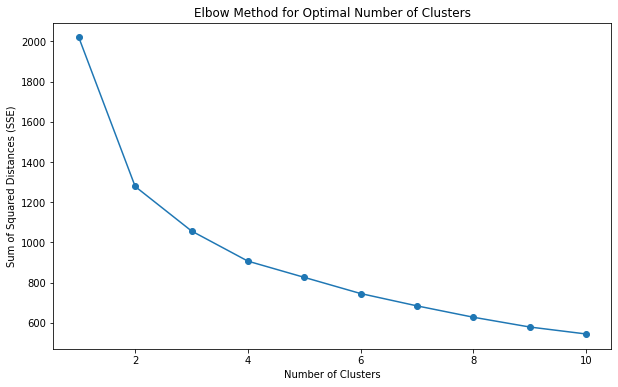

In [68]:
# Elbow method for K-means to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot SSE against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()



### Searching for the optimal K for agglomerative clustering

Optimal number of clusters based on Davies-Bouldin Score: 4


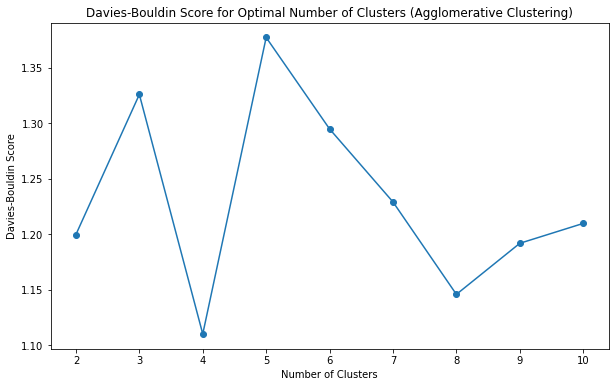

In [69]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Range of number of clusters to evaluate
range_n_clusters = range(2, 11)

# List to store the DB scores for each number of clusters
db_scores = []

# Calculate DB score for each number of clusters
for n_clusters in range_n_clusters:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # You can change linkage method if needed
    cluster_labels = agg_clustering.fit_predict(scaled_features)
    db_score = davies_bouldin_score(scaled_features, cluster_labels)
    db_scores.append(db_score)

# Plot DB scores against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, db_scores, marker='o')
plt.title('Davies-Bouldin Score for Optimal Number of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Identify the optimal number of clusters as the one with the lowest DB score
optimal_n_clusters_db = range_n_clusters[db_scores.index(min(db_scores))]
print(f'Optimal number of clusters based on Davies-Bouldin Score: {optimal_n_clusters_db}')

### Using the optimal K for both agglomerative and K means

In [70]:
optimal_k = 4

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
filtered_team_stats['kmeans_cluster'] = kmeans_labels

# Apply Agglomerative Clustering with the best linkage criteria and optimal clusters
optimal_linkage = 'ward'
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage=optimal_linkage)
agg_labels = agg_clustering.fit_predict(scaled_features)
filtered_team_stats['agg_cluster'] = agg_labels

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Davies-Bouldin Index: 1.1448544023705145
Agglomerative Clustering Davies-Bouldin Index: 1.110329873432819


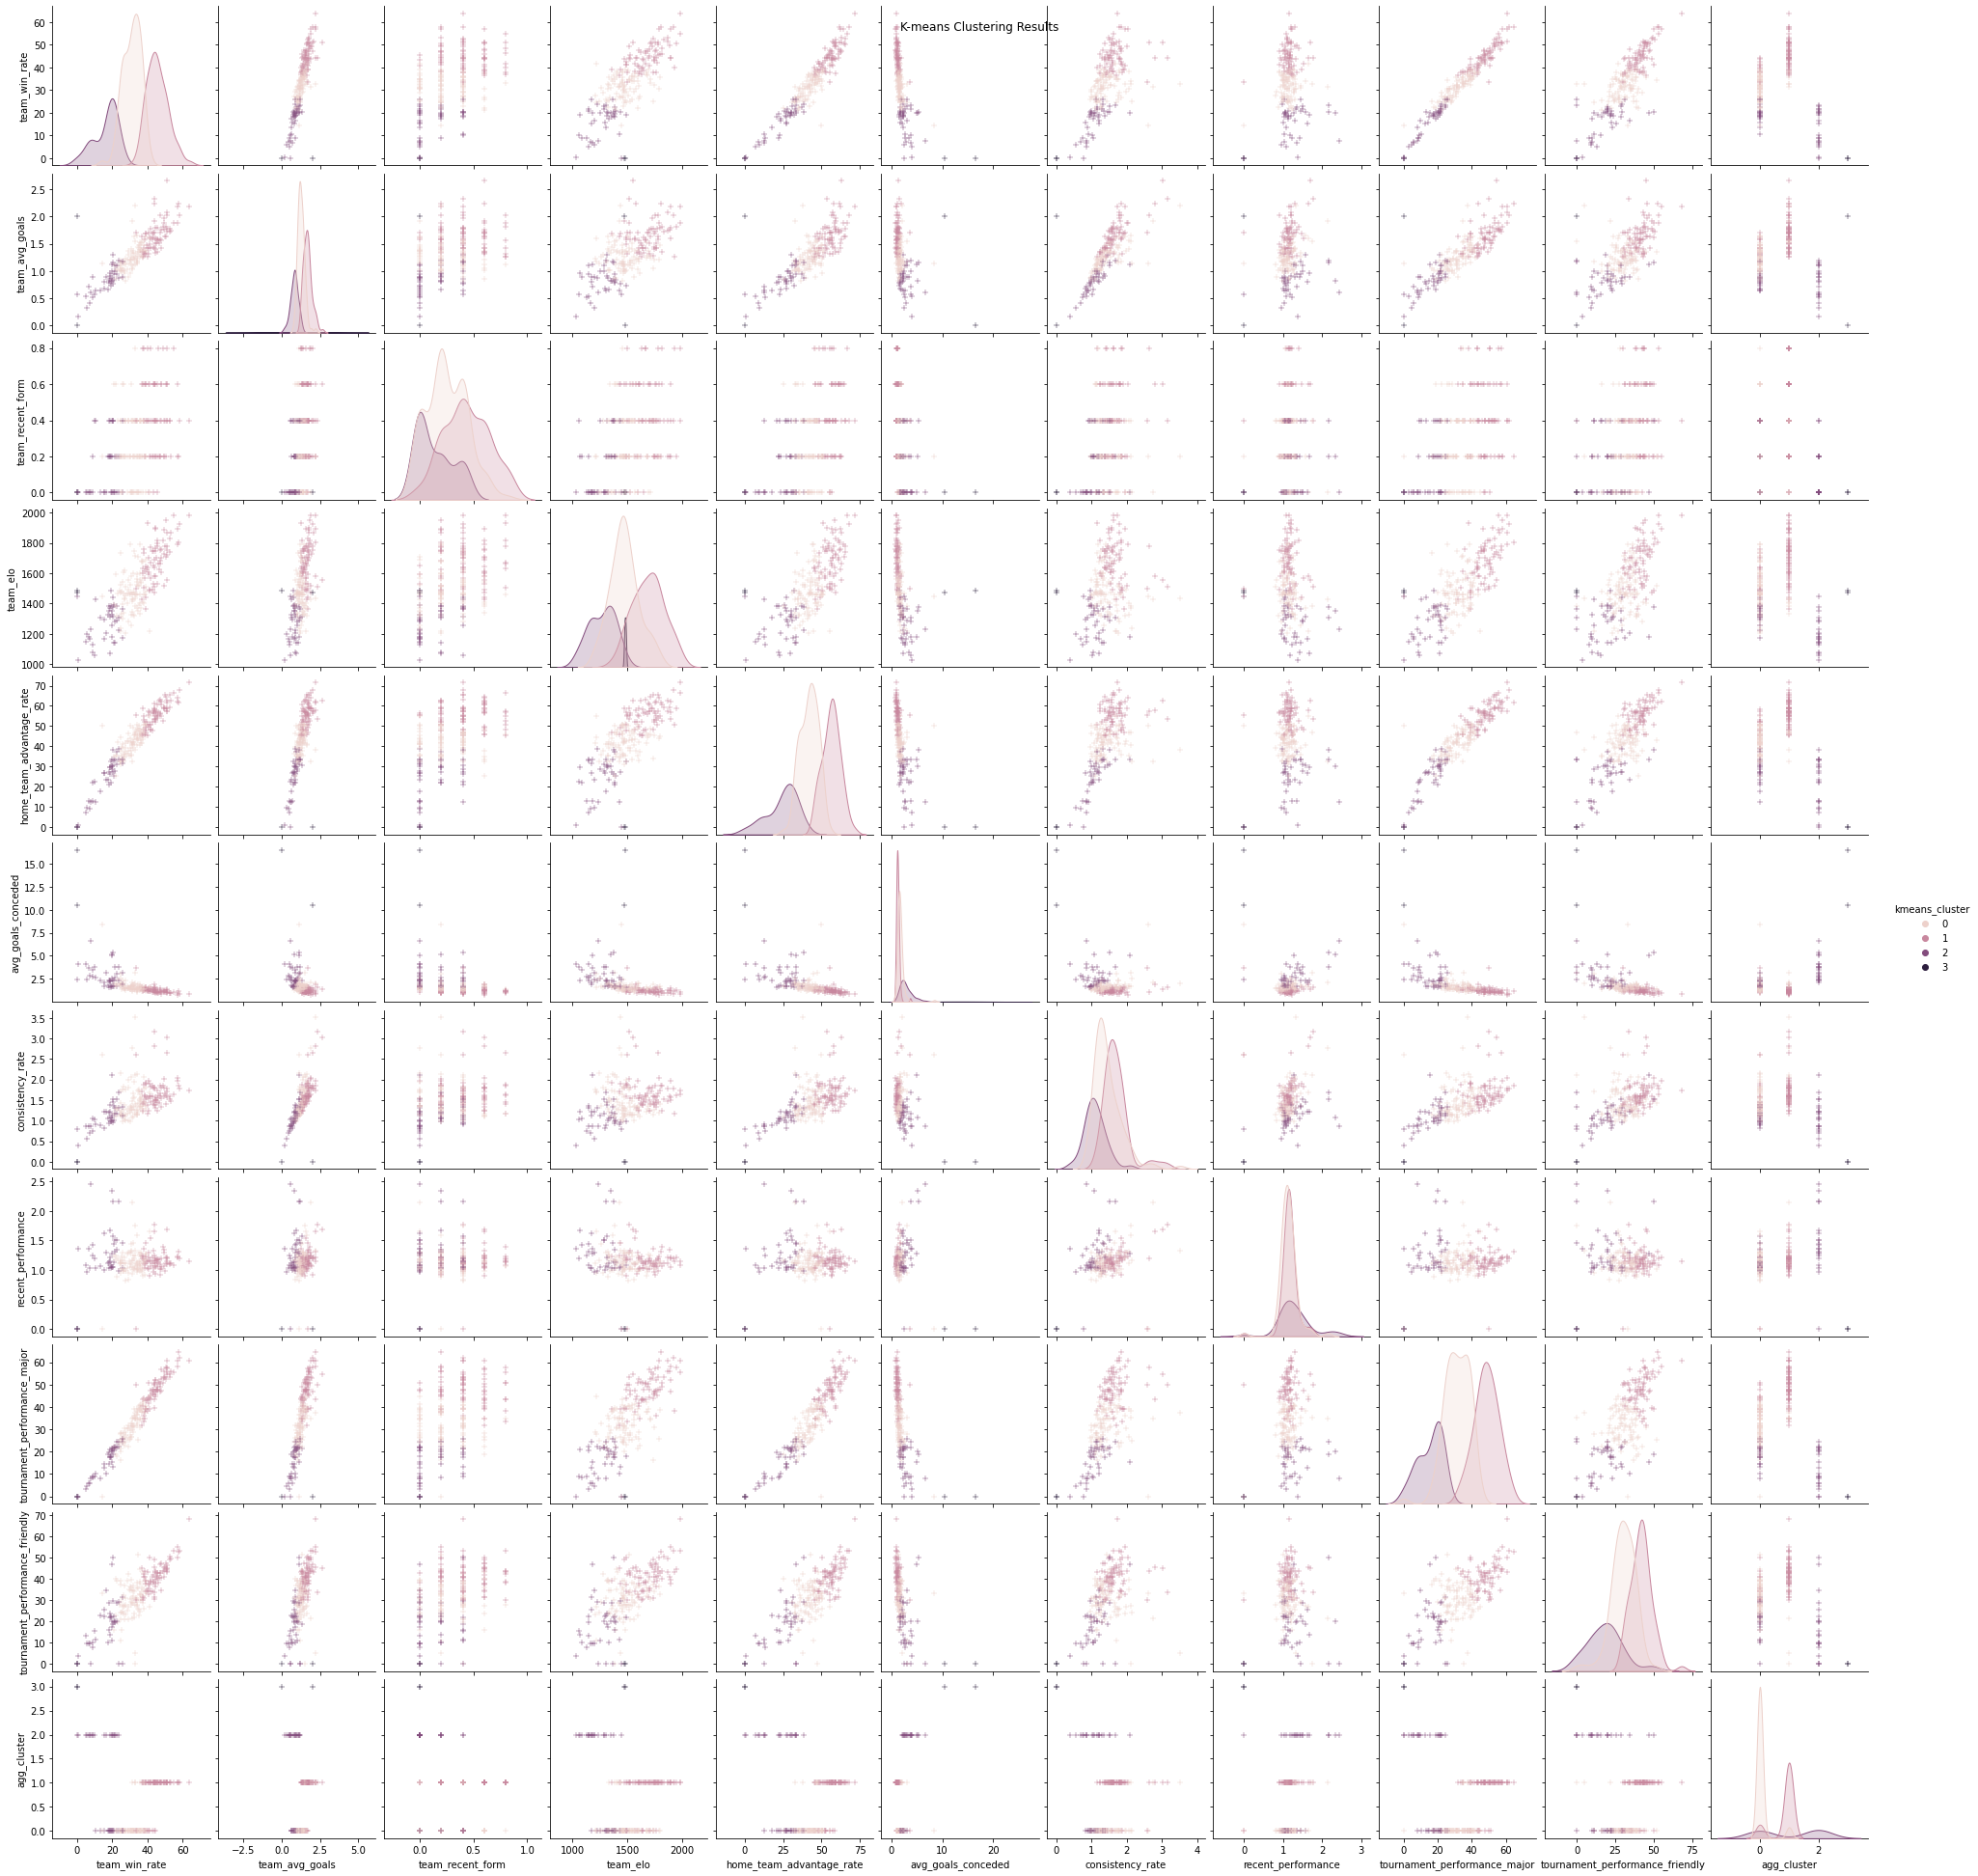

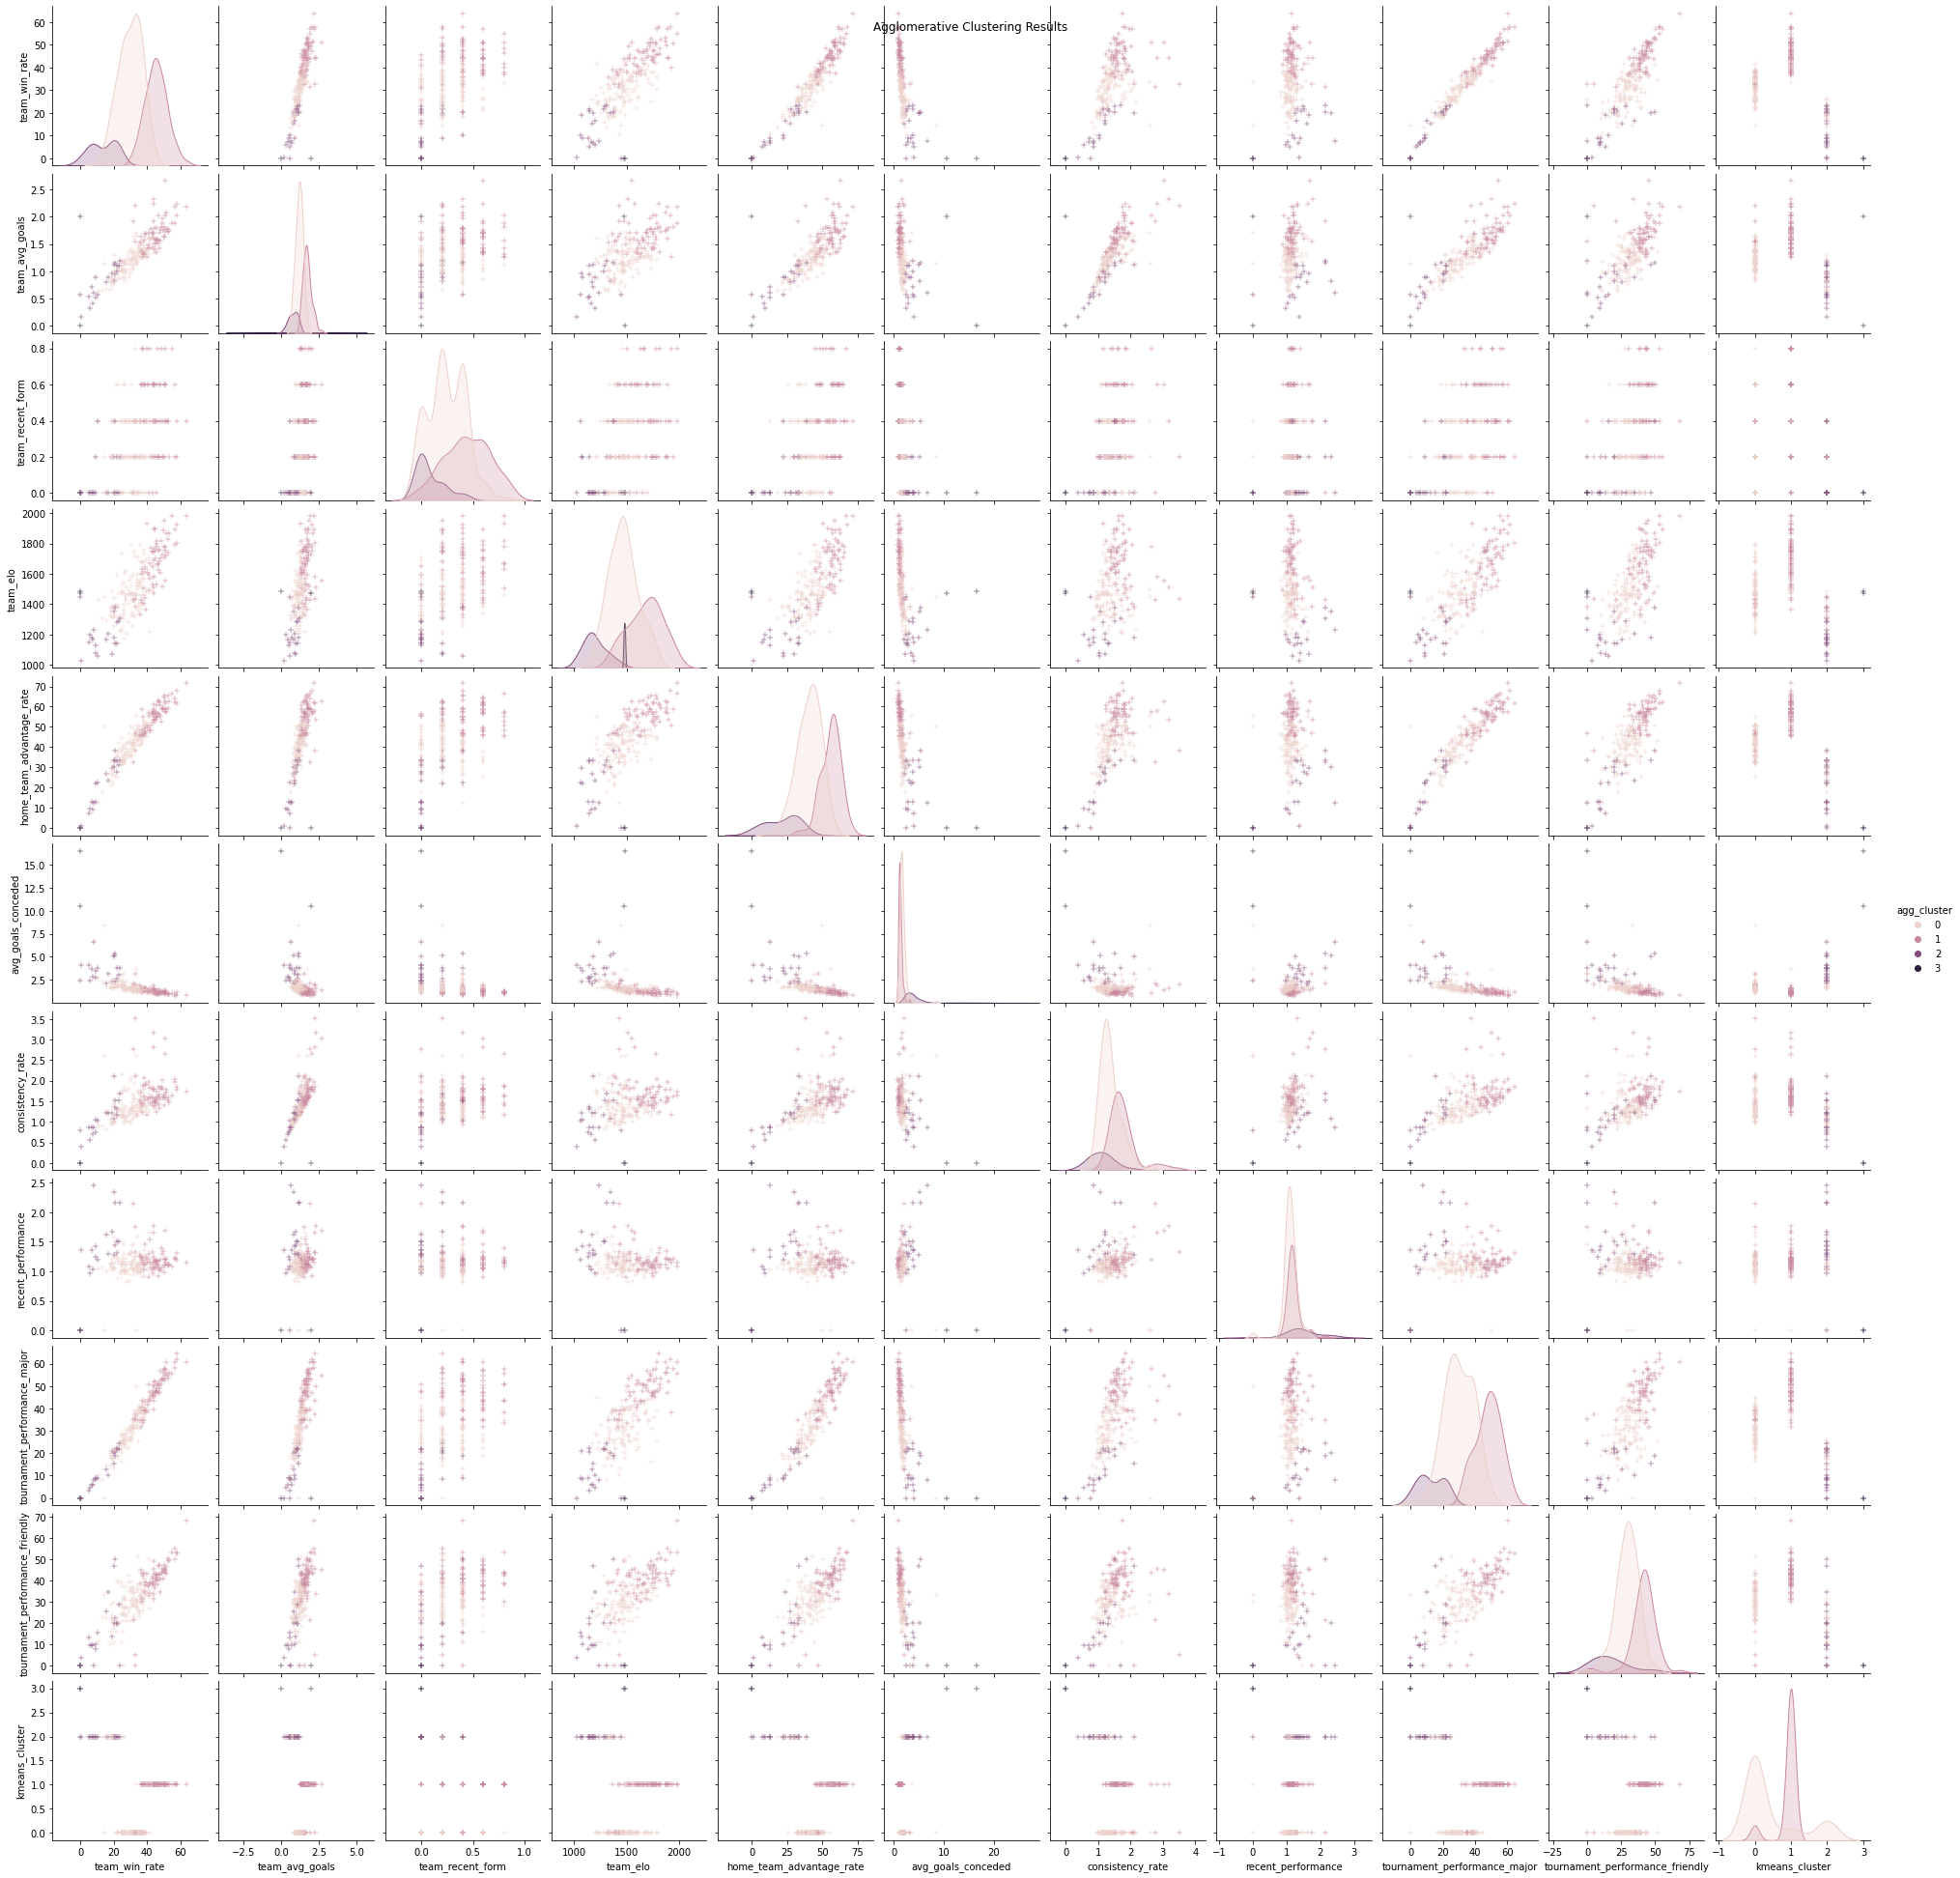

In [71]:
from sklearn.metrics import davies_bouldin_score

# Evaluate the quality of the clusters using Davies-Bouldin Index
kmeans_db_index = davies_bouldin_score(scaled_features, kmeans_labels)
agg_db_index = davies_bouldin_score(scaled_features, agg_labels)

print(f'K-means Davies-Bouldin Index: {kmeans_db_index}')
print(f'Agglomerative Clustering Davies-Bouldin Index: {agg_db_index}')

# Visualize the clusters using a pairplot
sns.pairplot(filtered_team_stats, hue='kmeans_cluster', diag_kind='kde', markers='+')
plt.suptitle('K-means Clustering Results')
plt.show()

sns.pairplot(filtered_team_stats, hue='agg_cluster', diag_kind='kde', markers='+')
plt.suptitle('Agglomerative Clustering Results')
plt.show()

# Save the results to a new CSV file
filtered_team_stats.to_csv('clustered_team_stats.csv', index=False)

### Clustering Results Analysis

**DBI Ranges:**
* Excellent: DBI close to 0. A score near 0 indicates very compact and well-separated clusters.
* Good: DBI in the range of 0 to 1.
* Moderate: DBI in the range of 1 to 2.
* Poor: DBI greater than 2.

#### K-means Clustering
- **Davies-Bouldin Index**: 1.1449
- **Interpretation**: The Davies-Bouldin Index (DBI) is a measure of cluster separation and compactness. A lower DBI value indicates better clustering performance. For K-means, a DBI of 1.1449 suggests that the clusters are reasonably well-separated and compact, but there is some overlap between clusters.

#### Agglomerative Clustering
- **Davies-Bouldin Index**: 1.1103
- **Interpretation**: The DBI for Agglomerative Clustering is 1.1103, which is slightly lower than that of K-means. This indicates that the Agglomerative Clustering algorithm has produced clusters that are more compact and well-separated compared to K-means.

### Visual Analysis of Pair Plots

#### K-means Clustering Pair Plot
- The pair plot for K-means shows the distribution and relationship of clusters across different features.
- Clusters are generally well-separated in several feature dimensions, such as team win rate and average goals conceded.
- There are some overlaps, indicating that certain clusters have similar characteristics in specific features.

#### Agglomerative Clustering Pair Plot
- The Agglomerative Clustering pair plot also shows distinct clusters with some overlap.
- Clusters appear to be more distinct compared to K-means, particularly in features like team Elo and average goals conceded.
- The visualization aligns with the DBI result, indicating slightly better-defined clusters than K-means.

### Summary
- Both K-means and Agglomerative Clustering produced reasonably good clusters, with Agglomerative Clustering having a slight edge in terms of cluster quality based on the Davies-Bouldin Index.
- The pair plots support this conclusion, showing more distinct clusters in Agglomerative Clustering.
- The most important features influencing the clustering results for both algorithms include average goals conceded, team win rate, and consistency rate. These features show significant variation across clusters and contribute to their separation.

## Explanation of Feature Importance
In clustering, feature importance can be derived by examining the centroids of each cluster. The centroid values for each feature indicate how much that feature contributes to defining each cluster. A higher absolute value (whether positive or negative) indicates a greater influence of that feature on the cluster's characteristics.

### Identifying Top Features
To identify the top three features that most influenced the clustering results for K-means and Agglomerative Clustering, we can examine the magnitude of the centroid values for each feature.

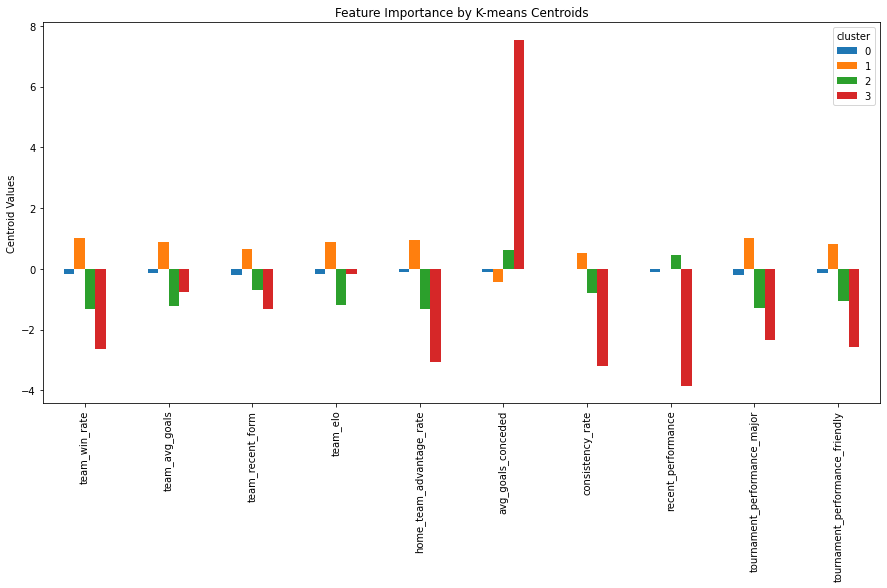

In [72]:
# Get centroids for K-means
kmeans_centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids
centroids_df = pd.DataFrame(data=kmeans_centroids, columns=features.columns)
centroids_df['cluster'] = range(4)

# Plot feature importance based on centroids
centroids_df.set_index('cluster').T.plot(kind='bar', figsize=(15, 7))
plt.title('Feature Importance by K-means Centroids')
plt.ylabel('Centroid Values')
plt.show()




### Feature Importance by K-means Centroids

In clustering, feature importance can be derived by examining the centroids of each cluster. The centroid values for each feature indicate how much that feature contributes to defining each cluster. A higher absolute value (whether positive or negative) indicates a greater influence of that feature on the cluster's characteristics.

**Identifying Top Features:**

To identify the top features that most influenced the clustering results for K-means clustering, we can examine the magnitude of the centroid values for each feature.

1. **Team Win Rate**: This feature is crucial in distinguishing between clusters, especially in Cluster 2, where it has a significant negative centroid value, indicating teams with lower win rates.
2. **Team Average Goals**: Cluster 1 is characterized by very high centroid values for this feature, indicating teams that tend to score a lot.
3. **Average Goals Conceded**: This feature stands out in Cluster 2 with a very high positive centroid value, suggesting that these teams tend to concede more goals.

By examining these centroid values, we can gain insights into the characteristics that define each cluster. For example, Cluster 2 might represent teams that perform poorly (low win rate, high goals conceded), while Cluster 1 might represent high-scoring teams.

<ipython-input-73-de8521d93eed>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_cluster_means = filtered_team_stats.groupby('agg_cluster').mean()


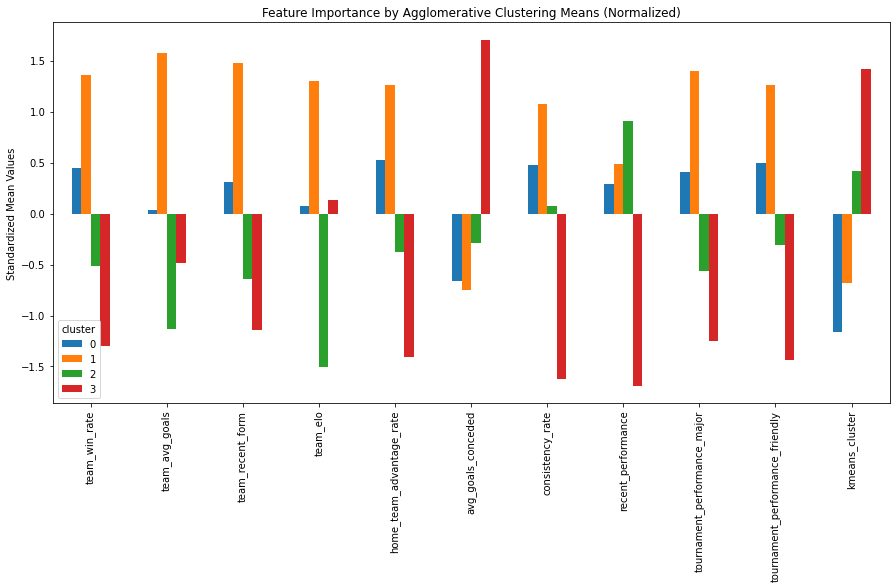

In [73]:
# Calculate the mean of each feature for each cluster in Agglomerative Clustering
agg_cluster_means = filtered_team_stats.groupby('agg_cluster').mean()

# Standardize the means
scaler = StandardScaler()
agg_cluster_means_scaled = scaler.fit_transform(agg_cluster_means)

# Create a DataFrame for the normalized cluster means
agg_cluster_means_df = pd.DataFrame(data=agg_cluster_means_scaled, columns=agg_cluster_means.columns)
agg_cluster_means_df['cluster'] = agg_cluster_means.index

# Plot feature importance based on normalized cluster means
agg_cluster_means_df.set_index('cluster').T.plot(kind='bar', figsize=(15, 7))
plt.title('Feature Importance by Agglomerative Clustering Means (Normalized)')
plt.ylabel('Standardized Mean Values')
plt.show()

### Feature Importance by Agglomerative Clustering Means

In clustering, feature importance can be derived by examining the mean values of each feature within each cluster. The mean values for each feature indicate how much that feature contributes to defining each cluster. A higher absolute value (whether positive or negative) indicates a greater influence of that feature on the cluster's characteristics.

**Identifying Top Features:**

To identify the top features that most influenced the clustering results for Agglomerative Clustering, we can examine the magnitude of the standardized mean values for each feature.

1. **Team Win Rate**: This feature is crucial in distinguishing between clusters, especially in Cluster 2, where it has a significant negative mean value, indicating teams with lower win rates.
2. **Team Average Goals**: Cluster 1 is characterized by very high mean values for this feature, indicating teams that tend to score a lot.
3. **Average Goals Conceded**: This feature stands out in Cluster 2 with a very high positive mean value, suggesting that these teams tend to concede more goals.

By examining these mean values, we can gain insights into the characteristics that define each cluster. For example, Cluster 2 might represent teams that perform poorly (low win rate, high goals conceded), while Cluster 1 might represent high-scoring teams.

# Section E

# Section E

## Clustering and Dimensions Reduction
### Reducing dimensions of the teams data using PCA and showing the feature importance for the top 3 PCs

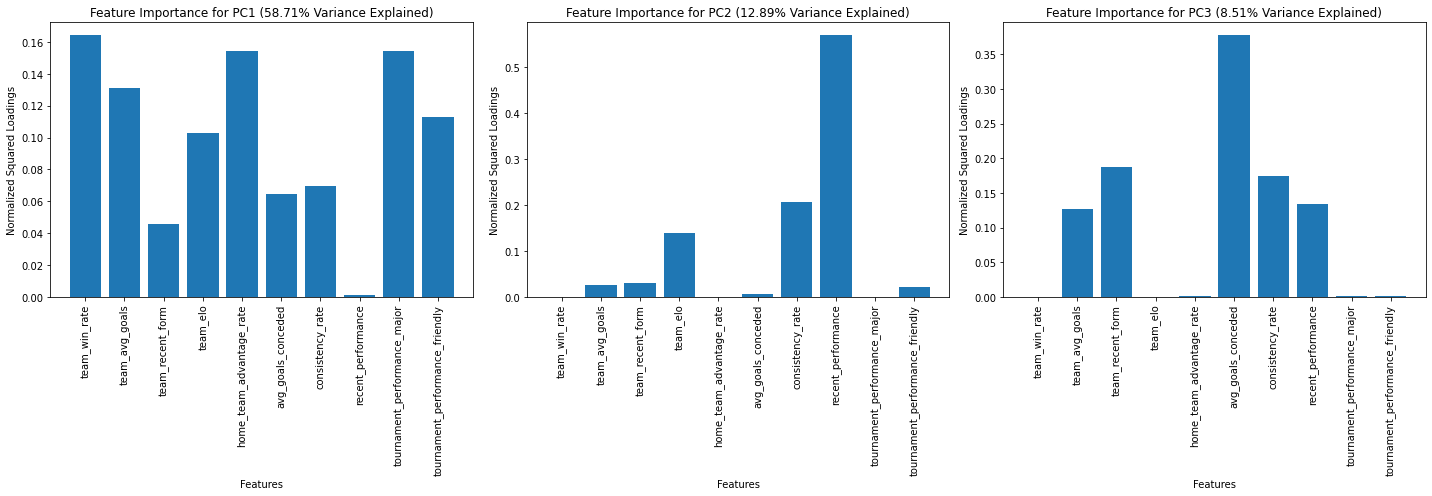

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Fit PCA
pca = PCA(n_components=None)
pca_features = pca.fit_transform(scaled_features)

# Step 2: Obtain the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))], index=features.columns)

# Step 3: Calculate the squared loadings (variance explained by each feature)
squared_loadings = loadings**2

# Step 4: Normalize the squared loadings
normalized_loadings = squared_loadings.div(squared_loadings.sum(axis=0), axis=1)

# Step 5: Plot the feature importances for the top 3 PCs
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

for i in range(3):
    pc = f'PC{i+1}'
    variance_explained = pca.explained_variance_ratio_[i] * 100
    axs[i].bar(normalized_loadings.index, normalized_loadings[pc])
    axs[i].set_title(f'Feature Importance for {pc} ({variance_explained:.2f}% Variance Explained)')
    axs[i].set_xlabel('Features')
    axs[i].set_ylabel('Normalized Squared Loadings')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Explanation of Feature Importance for Principal Components (PCs)

#### Feature Importance for PC1 (58.71% Variance Explained)
In the first plot, we see the feature importances for PC1. The features `team_win_rate`, `team_avg_goals`, and `home_team_advantage_rate` have the highest importance for PC1. This means that PC1 is largely influenced by these features, indicating that these features contribute the most to the variation in the dataset along this principal component. 

- **team_win_rate**: High importance suggests that this feature significantly affects the spread of data along PC1.
- **team_avg_goals**: This feature also plays a crucial role in the variance explained by PC1.
- **home_team_advantage_rate**: This feature contributes significantly to the first principal component.

#### Feature Importance for PC2 (12.89% Variance Explained)
In the second plot, we see the feature importances for PC2. The features `recent_performance` and `team_elo` are the most important for PC2.

- **recent_performance**: This feature has the highest importance for PC2, indicating that recent performance is a key differentiator along this component.
- **team_elo**: This feature also significantly affects the variance explained by PC2.

#### Feature Importance for PC3 (8.51% Variance Explained)
In the third plot, we see the feature importances for PC3. The features `avg_goals_conceded`, `consistency_rate`, and `team_elo` are the most important for PC3.

- **avg_goals_conceded**: This feature has the highest importance for PC3, suggesting it plays a major role in the variation along this component.
- **consistency_rate**: This feature also contributes significantly to PC3.
- **team_elo**: It continues to be important, indicating its influence across multiple principal components.

### Impact on PCA
The visualizations illustrate how different features contribute to the principal components. The first principal component (PC1) explains the most variance (58.71%), and features related to win rate, average goals, and home team advantage are most influential. The second principal component (PC2) explains a smaller proportion of the variance (12.89%), with recent performance and team ELO being key contributors. The third principal component (PC3) further explains 8.51% of the variance, with average goals conceded and consistency rate being prominent.

Understanding the importance of these features helps in interpreting the dimensions that PCA creates. It shows how PCA reduces the dimensionality of the data by focusing on the features that contribute the most to the variance, thereby simplifying the complexity while retaining most of the information. This, in turn, influences clustering and other analyses performed on the reduced dataset.

### Showing which principal components explain the majority of the variavce in the data

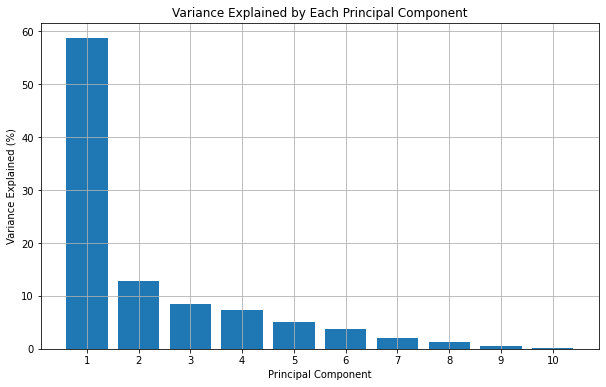

In [75]:
# Bar plot showing the variance explained by each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_ * 100)
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


### Explanation of Variance Explained by Each Principal Component

#### Bar Plot Showing the Variance Explained by Each Principal Component

In this bar plot, we observe the amount of variance explained by each principal component (PC). Principal components are ordered in decreasing order of the variance they capture from the dataset.

- **PC1**: The first principal component explains approximately 58.71% of the total variance. This indicates that more than half of the data's variability can be captured by this single component. It highlights the presence of strong patterns or trends in the dataset that are well-represented by PC1.
  
- **PC2**: The second principal component accounts for around 12.89% of the variance. Combined with PC1, the first two components capture over 71% of the total variance, which is significant for understanding the underlying structure of the data.

- **PC3**: The third principal component explains 8.51% of the variance. Together, the top three principal components capture around 80% of the total variance, providing a substantial reduction in dimensionality while preserving most of the information.

- **Subsequent PCs**: The remaining principal components (PC4, PC5, etc.) each explain progressively smaller amounts of variance. This indicates that these components capture finer details or less significant patterns in the dataset.

### Impact on PCA
This plot helps us understand how much of the original data's variability is retained as we reduce its dimensions. By capturing the majority of the variance with just a few principal components, PCA allows for effective dimensionality reduction. This reduction simplifies the complexity of the data, making it easier to visualize, analyze, and apply clustering algorithms.

Using the top principal components, we can perform clustering and other analyses more efficiently, focusing on the most significant features and patterns. This also helps in avoiding overfitting and improving the generalization of models built on the reduced dataset.

### Applying K-means and Agglomerative clustring on the principal components

In [76]:
# Step 6: Use the top principal components to perform clustering
# We'll use the top components that explain, for example, 95% of the variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_top_components = np.argmax(explained_variance_ratio >= 0.95) + 1
top_pca_features = pca_features[:, :n_top_components]

# optimal k and optimal linkage
optimal_linkage = 'ward'
optimal_k = 4

# Apply K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(top_pca_features)
filtered_team_stats['kmeans_pca_cluster'] = kmeans_pca_labels

# Apply Agglomerative Clustering on PCA-transformed data
agg_clustering_pca = AgglomerativeClustering(n_clusters=optimal_k, linkage=optimal_linkage)
agg_pca_labels = agg_clustering_pca.fit_predict(top_pca_features)
filtered_team_stats['agg_pca_cluster'] = agg_pca_labels

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualize the clusters before PCA using pair plots

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


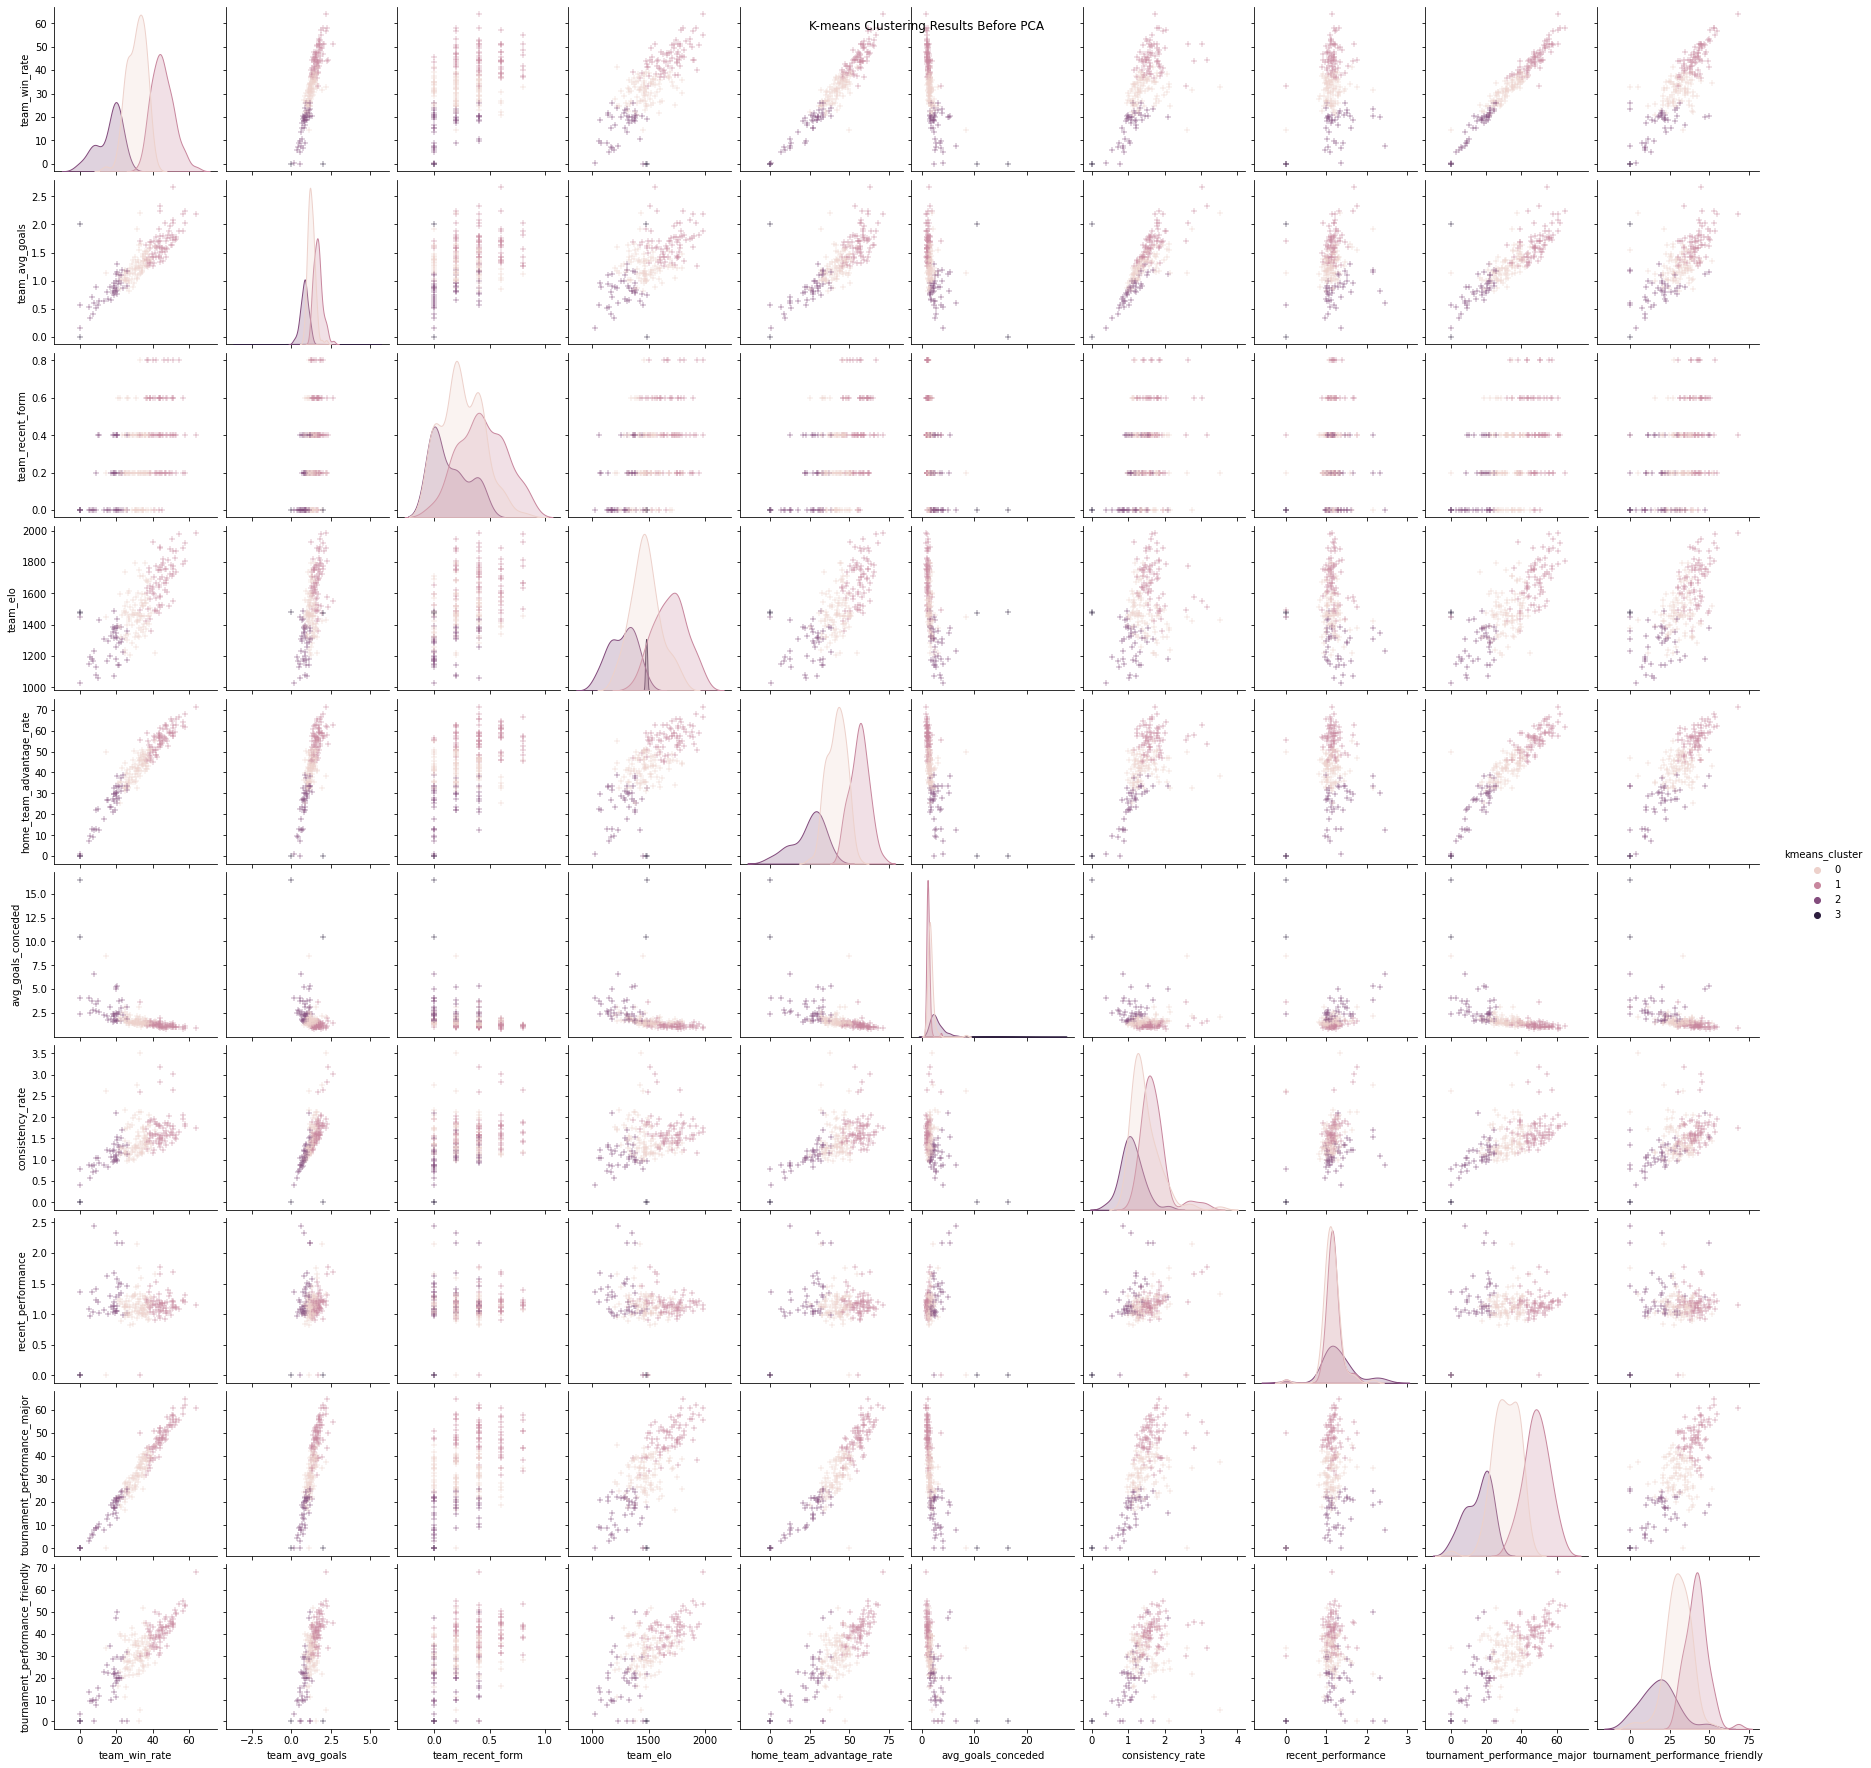

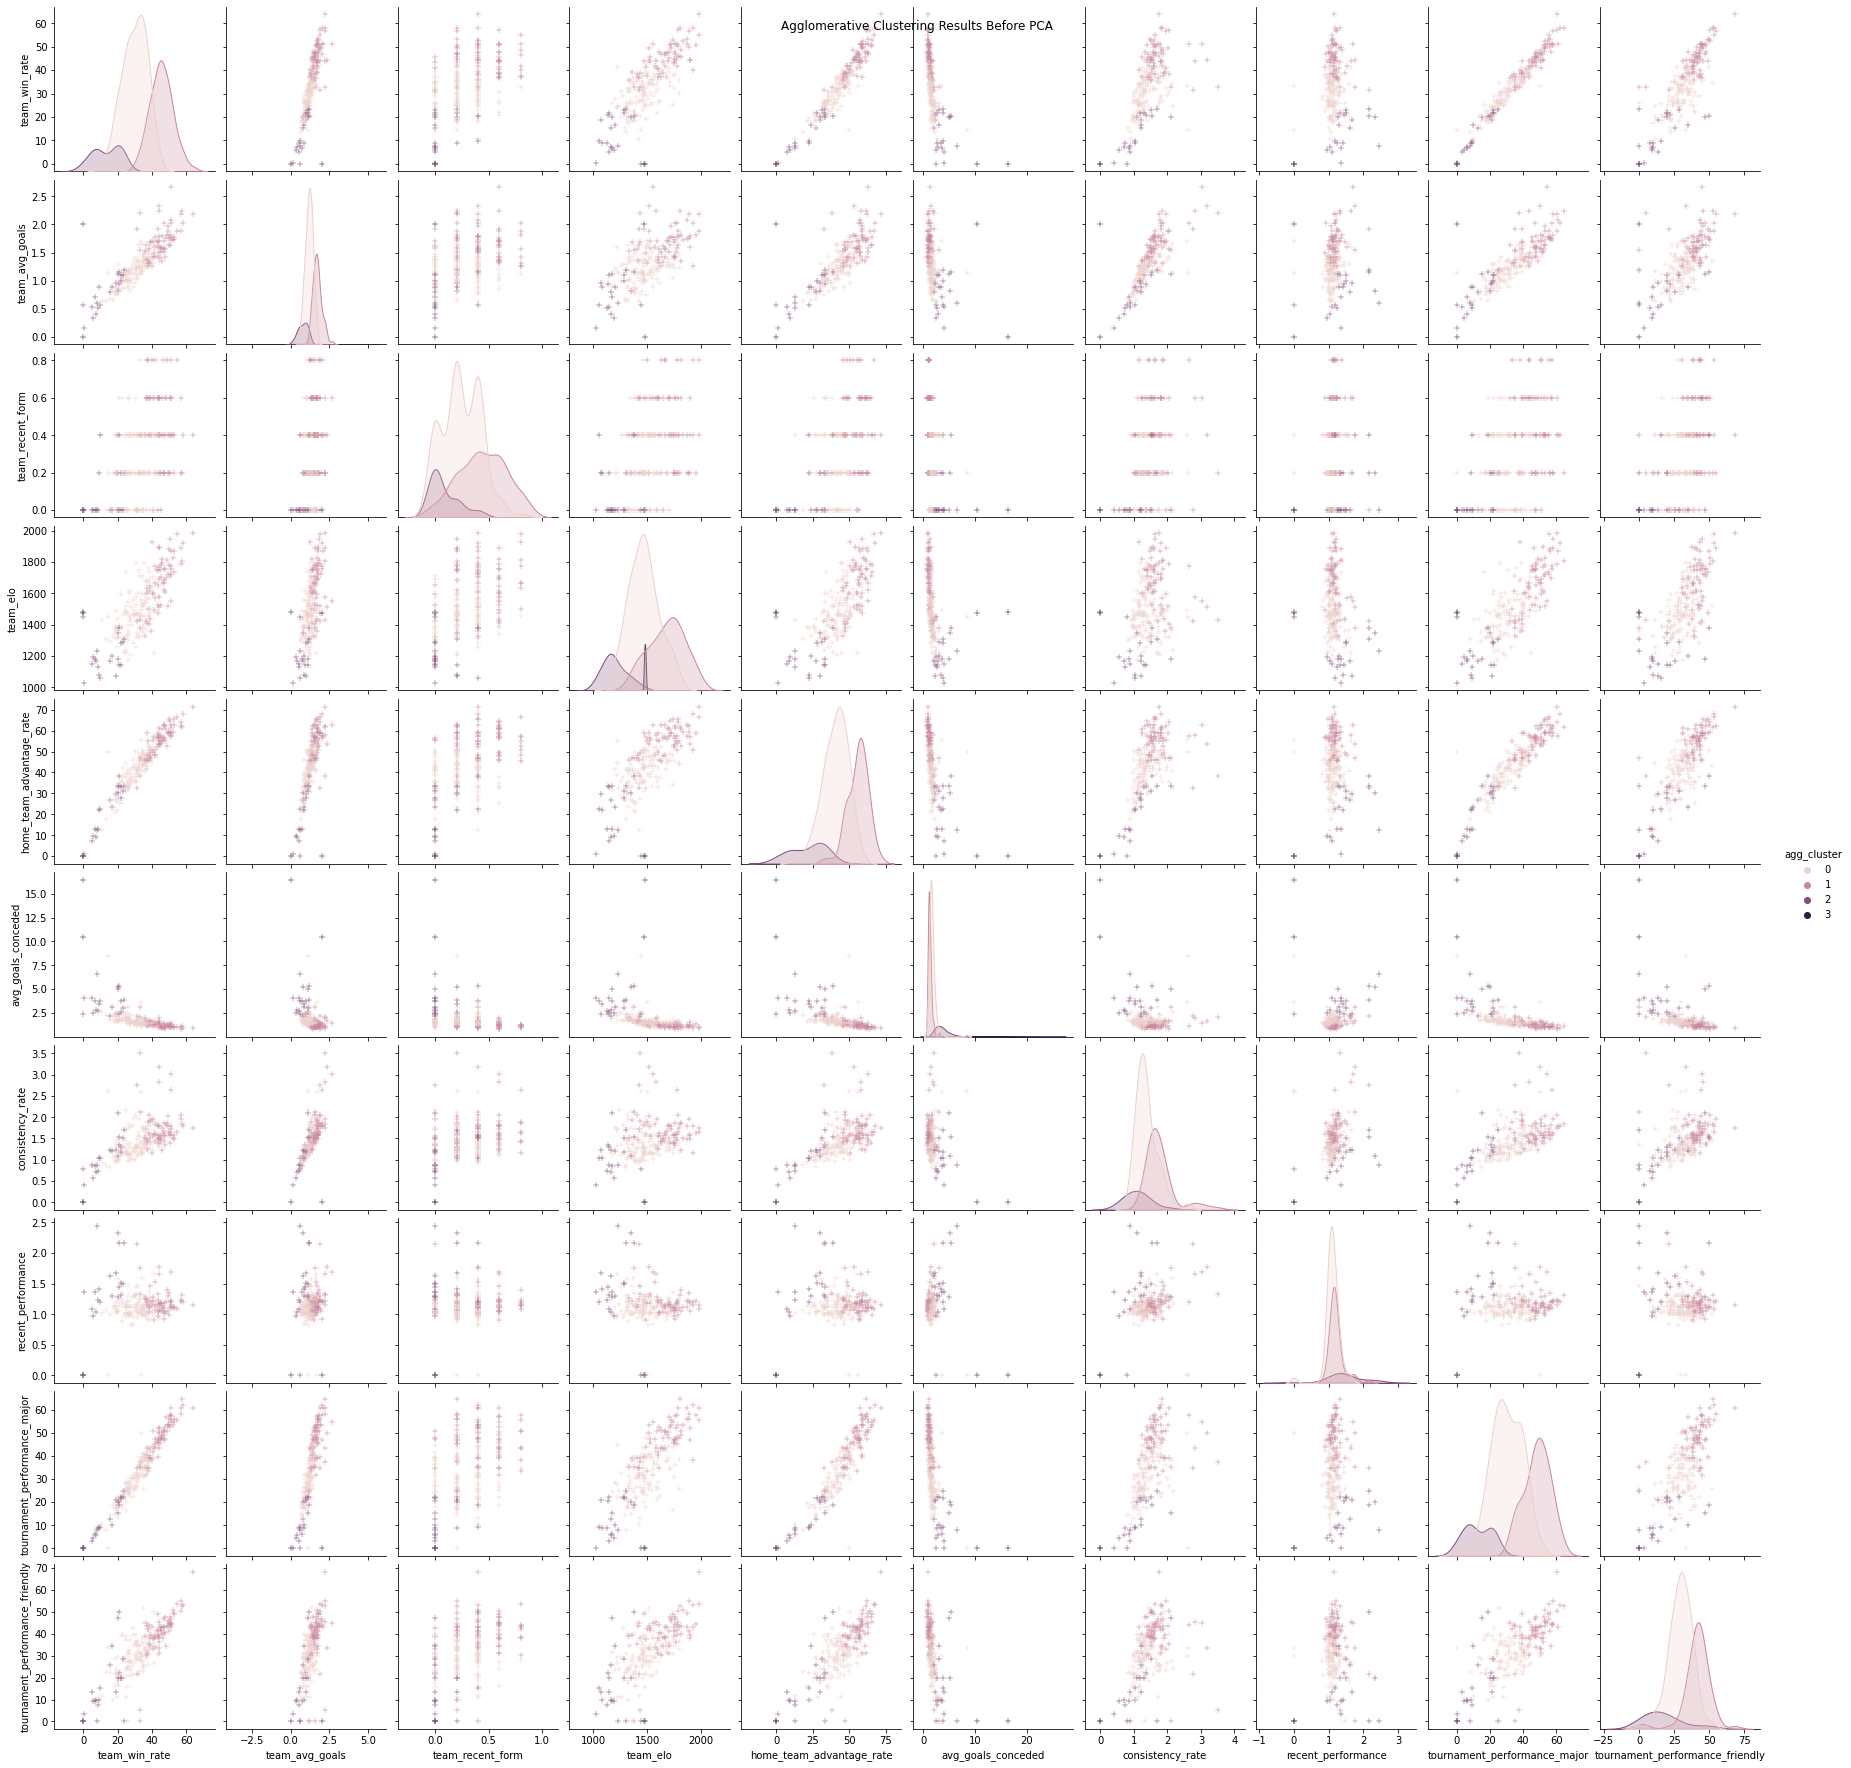

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

# Step 7: Visualize clusters before PCA
# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
filtered_team_stats['kmeans_cluster'] = kmeans_labels

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage=optimal_linkage)
agg_labels = agg_clustering.fit_predict(scaled_features)
filtered_team_stats['agg_cluster'] = agg_labels

# Columns to exclude from kmeans
exclude_columns_k = ['agg_cluster', 'kmeans_pca_cluster', 'agg_pca_cluster']

# Visualize clusters before PCA using pair plots
sns.pairplot(filtered_team_stats.drop(columns=exclude_columns_k), hue='kmeans_cluster', diag_kind='kde', markers='+')
plt.suptitle('K-means Clustering Results Before PCA')
plt.show()

# Columns to exclude from agglomerative
exclude_columns_agg = ['kmeans_cluster', 'kmeans_pca_cluster', 'agg_pca_cluster']

sns.pairplot(filtered_team_stats.drop(columns=exclude_columns_agg), hue='agg_cluster', diag_kind='kde', markers='+')
plt.suptitle('Agglomerative Clustering Results Before PCA')
plt.show()

### Explanation of Clustering Results Before PCA

The pair plots visualize the clustering results before applying PCA.

#### K-means Clustering Before PCA
- **Pair Plot:**
  - The clusters are visualized using the original features.
  - Each pair plot shows the relationship between two features, colored by the cluster labels.
  - This helps in understanding how the original features contribute to the clustering.

#### Agglomerative Clustering Before PCA
- **Pair Plot:**
  - Similar to the K-means pair plot, the clusters are visualized using the original features.
  - The pair plots show the relationships between the features, colored by the cluster labels.
  - This visualization highlights how the agglomerative clustering algorithm groups the data based on the original feature space.

### Visualize the clusters after PCA

Davies-Bouldin Index for K-means Clustering After PCA: 1.10
Davies-Bouldin Index for Agglomerative Clustering After PCA: 1.23


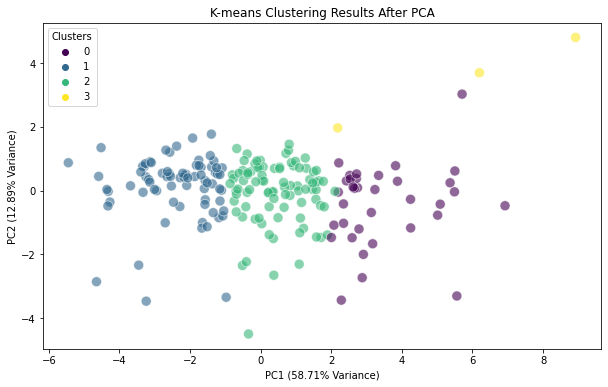

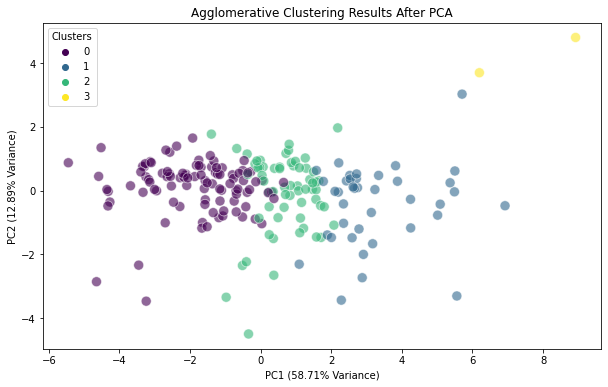

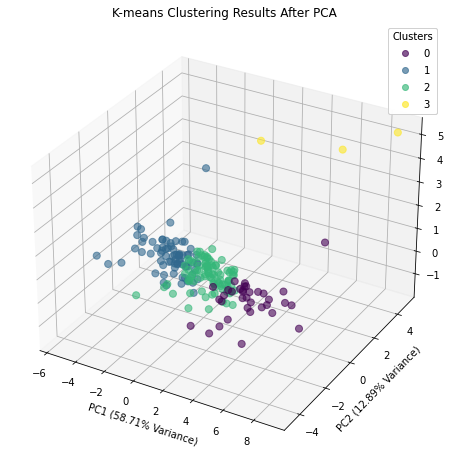

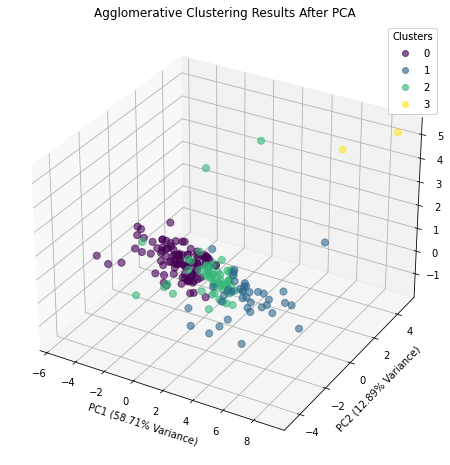

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

# Visualize clusters after PCA using the top 2 principal components
# 2D scatter plot for K-means clusters after PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_pca_features[:, 0], y=top_pca_features[:, 1], hue=filtered_team_stats['kmeans_pca_cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('K-means Clustering Results After PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(title='Clusters')
plt.show()

# 2D scatter plot for Agglomerative clusters after PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_pca_features[:, 0], y=top_pca_features[:, 1], hue=filtered_team_stats['agg_pca_cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('Agglomerative Clustering Results After PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(title='Clusters')
plt.show()

# Calculate and display the DBI scores
kmeans_dbi = davies_bouldin_score(top_pca_features, filtered_team_stats['kmeans_pca_cluster'])
agg_dbi = davies_bouldin_score(top_pca_features, filtered_team_stats['agg_pca_cluster'])

print(f'Davies-Bouldin Index for K-means Clustering After PCA: {kmeans_dbi:.2f}')
print(f'Davies-Bouldin Index for Agglomerative Clustering After PCA: {agg_dbi:.2f}')

# Ensure we have at least 3 principal components for 3D visualization
if top_pca_features.shape[1] >= 3:
    # 3D scatter plot for K-means clusters after PCA
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(top_pca_features[:, 0], top_pca_features[:, 1], top_pca_features[:, 2], c=filtered_team_stats['kmeans_pca_cluster'], cmap='viridis', s=50, alpha=0.6)
    ax.set_title('K-means Clustering Results After PCA')
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
    ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% Variance)')
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)
    plt.show()

    # 3D scatter plot for Agglomerative clusters after PCA
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(top_pca_features[:, 0], top_pca_features[:, 1], top_pca_features[:, 2], c=filtered_team_stats['agg_pca_cluster'], cmap='viridis', s=50, alpha=0.6)
    ax.set_title('Agglomerative Clustering Results After PCA')
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
    ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% Variance)')
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)
    plt.show()
else:
    print("Not enough PCA components for 3D scatter plots")

#### Clustering Results After PCA

The scatter plots and 3D plots show the clustering results using the top principal components after PCA.

- **K-means Clustering (2D and 3D):**
  - The clusters are plotted using the first two and first three principal components.
  - PC1 and PC2 explain a significant portion of the variance, allowing for a clear visualization of the clusters.
  - The 3D plot provides a more comprehensive view of the cluster distribution.
  - Davies-Bouldin Index for K-means Clustering After PCA: 1.10


- **Agglomerative Clustering (2D and 3D):**
  - Similar to K-means, the clusters are plotted using the first two and first three principal components.
  - The clusters appear differently, highlighting the influence of the clustering algorithm on the results.
  - Davies-Bouldin Index for Agglomerative Clustering After PCA: 1.23


These visualizations allow for a comparison of clustering results before and after PCA, illustrating how dimensionality reduction impacts the clustering outcomes. 

PCA reduces the dimensionality of the data while retaining most of the variance, making it easier to visualize and understand the structure of the data and the clustering results.

### Comparison of Clusters Before and After PCA

#### Before PCA
- **K-means Clustering:**
  - **Davies-Bouldin Index:** 1.1449
  - K-means clustering struggles to separate clusters clearly in the high-dimensional, original feature space. The clusters exhibit significant overlap, making it difficult to interpret the clustering results.

- **Agglomerative Clustering:**
  - **Davies-Bouldin Index:** 1.1103
  - Agglomerative clustering also faces challenges in distinguishing clusters in the original feature space, with significant overlap and lack of clear separation.

#### After PCA
- **K-means Clustering:**
  - **Davies-Bouldin Index:** 1.10
  - The clustering results improve after applying PCA. The clusters are more distinct and better separated in the lower-dimensional space defined by the top principal components. PCA reduces the complexity of the data, highlighting the most important features and enabling more effective clustering.

- **Agglomerative Clustering:**
  - **Davies-Bouldin Index:** 1.23
  - The DBI score increased slightly, indicating a decrease in clustering quality. However, the clusters appear more visually distinct in the lower-dimensional space, suggesting that PCA still aids in better defining the cluster structure.

### Overall Impact of PCA

- **Dimensionality Reduction:**
  - PCA simplifies the data by reducing its dimensionality and capturing the most significant features, leading to more distinct and interpretable clusters.

- **Improved Clustering Performance:**
  - By focusing on the principal components that explain the majority of the variance, PCA helps K-means clustering to perform better, resulting in clearer and more meaningful clusters.

- **Effectiveness in High-Dimensional Data:**
  - This comparison highlights the importance of PCA in preprocessing high-dimensional data before applying clustering algorithms, demonstrating its effectiveness in improving clustering results.

- **Davies-Bouldin Index Analysis:**
  - The DBI scores indicate better cluster separation and compactness after PCA for K-means, confirming the visual improvements seen in the scatter plots. Lower DBI scores post-PCA for K-means (1.1449 to 1.10) reflect enhanced clustering performance. The increase in the DBI for agglomerative clustering (from 1.1103 to 1.23) suggests a slight decline in clustering compactness and separation quality, but the visual clarity and distinct separation of clusters suggest that PCA still facilitates a better overall clustering structure.
  - The changes in Davies-Bouldin Index (DBI) scores before and after PCA can be attributed to PCA's ability to reduce data complexity and highlight key features. For K-means clustering, the decreased DBI after PCA suggests improved cluster separation and compactness by eliminating noise and redundant dimensions. However, the slight increase in DBI for agglomerative clustering may indicate that PCA, while enhancing visual clarity, slightly affected the data's intrinsic structure, leading to less compact clusters. Overall, PCA aids in better defining clusters, though its impact varies between clustering algorithms.

In [79]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Step 1: Reduce dimensions using PCA
pca = PCA(n_components=3)
pca_3d_features = pca.fit_transform(scaled_features)

# Step 2: Create a DataFrame for the PCA features
pca_df = pd.DataFrame(data=pca_3d_features, columns=['PC1', 'PC2', 'PC3'])
pca_df_k = pd.DataFrame(data=pca_3d_features, columns=['PC1', 'PC2', 'PC3'])
# Step 3: Add cluster labels to the DataFrame
pca_df['Cluster'] = filtered_team_stats['agg_cluster']  # Use the appropriate cluster label column
pca_df_k['Cluster'] = filtered_team_stats['kmeans_cluster']  # Use the appropriate cluster label column
# Step 4: Plot the PCA results in 3D using plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster',
                    labels={
                     "PC1": f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)',
                     "PC2": f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)',
                     "PC3": f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% Variance)',
                     "Cluster": 'Cluster'
                    },
                    title='Agglomerative PCA: Samples Distribution on First Three Principal Components') 

fig.show()



In [80]:
# for k means
fig_k = px.scatter_3d(pca_df_k, x='PC1', y='PC2', z='PC3', color='Cluster',
                    labels={
                     "PC1": f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)',
                     "PC2": f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)',
                     "PC3": f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}% Variance)',
                     "Cluster": 'Cluster'
                    },
                    title='K-means PCA: Samples Distribution on First Three Principal Components') 
fig_k.show()

# Section F

## Step 1: Create a New Dataset + Some EDA

### Using the `goalscorers.csv` file, we will create a new dataset where each row represents a player and the features represent the player's goal statistics.

- **Total Goals:** Total number of goals scored by the player.
- **Match Count:** Total number of matches the player has scored in.
- **Penalty Goals:** Number of goals scored via penalty.
- **Own Goals:** Number of own goals scored by the player.
- **First Goal Date:** Date of the first goal scored by the player.
- **Last Goal Date:** Date of the last goal scored by the player.
- **Earliest Goal Time:** The earliest minute in a match the player scored.
- **Latest Goal Time:** The latest minute in a match the player scored.
- **Own Goals Rate:** Ratio of own goals to total goals.
- **Penalty Goals Rate:** Ratio of penalty goals to total goals.
- **Match Goals Average:** Average number of goals scored per match.

#### Note:
1. **Guinness World Record for Longest International Football Career:** The longest recorded international football career is 26 years, which we will use as a reference to filter out unrealistic data points. By filtering goal spans up to 26 years, we aim to remove anomalies and potential duplicates. https://www.guinnessworldrecords.com/world-records/597388-longest-international-football-soccer-career
2. **Key Selection (Scorer, Team):** The combination of `scorer` and `team` is used as the key to ensure that player statistics are correctly aggregated. Players are not allowed to change teams by the soccer league roles, thus this key selection helps in accurately capturing the player's performance within each team.
3. **Data Quality Issue:** The dataset only provides player names without unique identifiers, leading to potential duplications where different players share the same name, even within the same team. By filtering out goal spans longer than 26 years (the Guinness record), we attempt to mitigate this issue, though we acknowledge that some duplicates may still exist.

### EDA: Distribution of Key Features
1. **Distribution of Goal Span in Years:** This plot helps us understand the typical goal span of players in terms of goal-scoring years.
2. **Distribution of Goals per Match Avg:** This plot shows how goal-scoring efficiency is distributed among players.
3. **Distribution of Total Goals:** This plot provides insight into the total goal-scoring capacity of players.
4. **Distribution of Matches Played:** This plot highlights how many matches players have typically participated in.

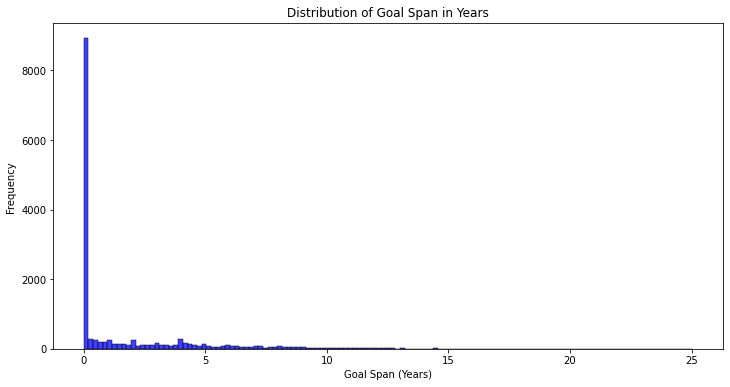

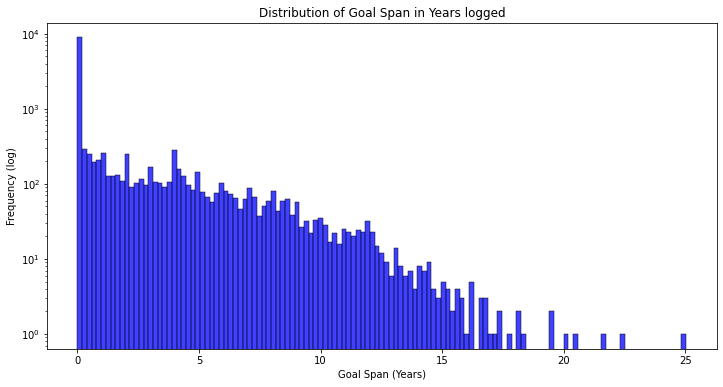

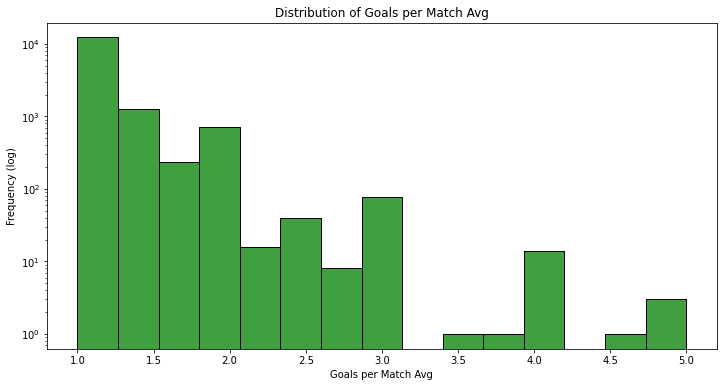

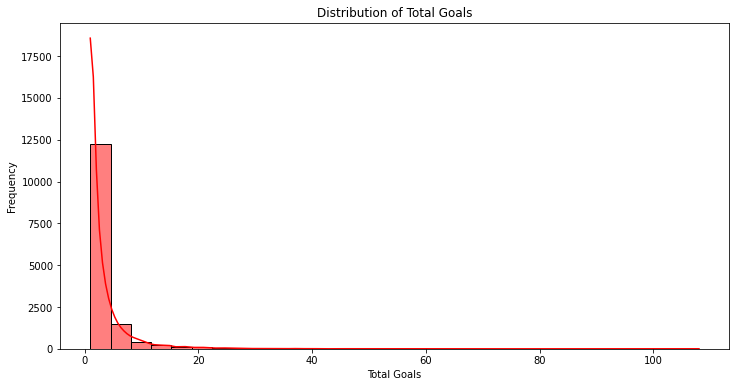

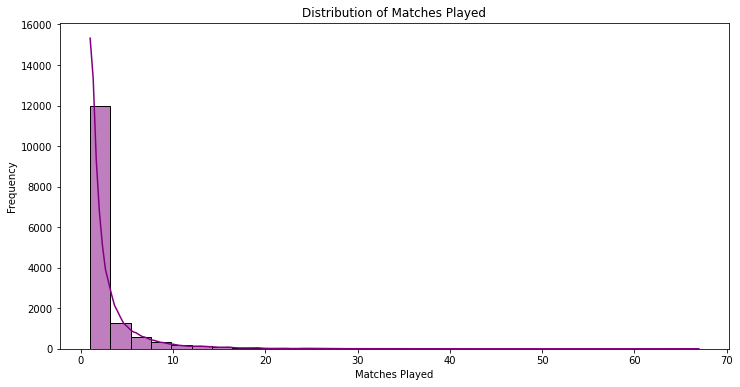

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

guiness_record = 26 #longest_international_football_world_record

# Load the dataset
data = pd.read_csv('goalscorers.csv')

# Process the dataset to create player statistics using (scorer, team) as the key
player_stats = data.groupby(['scorer', 'team']).agg(
    total_goals=('scorer', 'count'),
    match_count=('date', 'nunique'),
    penalty_goals=('penalty', 'sum'),
    own_goals=('own_goal', 'sum'),
    first_goal_date=('date', 'min'),
    last_goal_date=('date', 'max'),
    earliest_goal_time=('minute', 'min'),
    latest_goal_time=('minute', 'max')
).reset_index()

player_stats['own_goals_rate'] = player_stats['own_goals'] / player_stats['total_goals']
player_stats['penalty_goals_rate'] = player_stats['penalty_goals'] / player_stats['total_goals']

player_stats['match_goals_average'] = player_stats['total_goals'] / player_stats['match_count']

# Calculate duration between the first and last goals in days and years
player_stats['goal_span_days'] = (pd.to_datetime(player_stats['last_goal_date']) - pd.to_datetime(player_stats['first_goal_date'])).dt.days
player_stats['goal_span_years'] = player_stats['goal_span_days'] / 365

player_stats = player_stats[player_stats['goal_span_years'] <= guiness_record] 

# EDA: Plot the distribution of goal spans in years
plt.figure(figsize=(12, 6))
sns.histplot(player_stats['goal_span_years'], color='blue')
plt.xlabel('Goal Span (Years)')
plt.ylabel('Frequency ')
plt.title('Distribution of Goal Span in Years')
plt.show()

# EDA: Plot the distribution of goal spans in years logged
plt.figure(figsize=(12, 6))
sns.histplot(player_stats['goal_span_years'], color='blue')
plt.yscale('log')
plt.xlabel('Goal Span (Years)')
plt.ylabel('Frequency (log)')
plt.title('Distribution of Goal Span in Years logged')
plt.show()

# EDA: Plot the distribution of goals per match
plt.figure(figsize=(12, 6))
sns.histplot(player_stats['match_goals_average'], color='green')
plt.yscale('log')
plt.xlabel('Goals per Match Avg')
plt.ylabel('Frequency (log)')
plt.title('Distribution of Goals per Match Avg')
plt.show()

# EDA: Plot the distribution of total goals
plt.figure(figsize=(12, 6))
sns.histplot(player_stats['total_goals'], bins=30, kde=True, color='red')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Total Goals')
plt.show()

# EDA: Plot the distribution of matches played
plt.figure(figsize=(12, 6))
sns.histplot(player_stats['match_count'], bins=30, kde=True, color='purple')
plt.xlabel('Matches Played')
plt.ylabel('Frequency')
plt.title('Distribution of Matches Played')
plt.show()

## Step 2: Formulate a Question

### Question:
Can we predict if a player will have a short-term or long-term goal span? Specifically, can we predict whether the duration between a player's first and last goals in years will be more than one year or not?

### Machine Learning Algorithm:
We will use a **Random Forest Classifier** for this binary classification problem. The Random Forest algorithm is chosen because:
1. It handles both numerical and categorical features effectively.
2. It is robust to overfitting.
3. It provides feature importance metrics, which helps in understanding the factors influencing the predictions.


## Step 3: Run Algorithm

### Data Preparation
- **Binary Target Variable:** We create a binary target variable, `goal_span_binary`, where 0 indicates a goal span of 0 years (short-term) and 1 indicates a goal span of more than 1 year (long-term).

### Feature Exclusion:
- **First Goal Date** and **Last Goal Date:** These features are directly related to the target variable and might introduce bias.
- **Total Goals** and **Match Count:** As we wanted to make a predictive model - we decsdied not to use amount of 'X' features that could be higly correlated, an thos less interesting. instead we went for more infering style predeiction where we only use rates, rations, etc.
- **Scorer and Team:** These are identifiers thus can introduce bias and variance and can be excluded.
- **Goal Span Days and Goal Span Years:** Directly related to the target variable and thus excluded to avoid data leakage.

Accuracy: 0.8482264665757162
Classification Report:
              precision    recall  f1-score   support

     0 years       0.90      0.87      0.89      2022
 Not 0 years       0.74      0.79      0.76       910

    accuracy                           0.85      2932
   macro avg       0.82      0.83      0.83      2932
weighted avg       0.85      0.85      0.85      2932

Confusion Matrix:
[[1764  258]
 [ 187  723]]


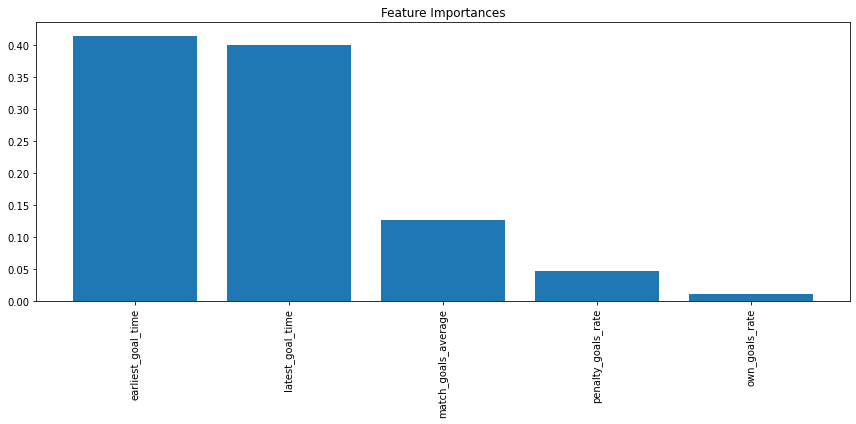

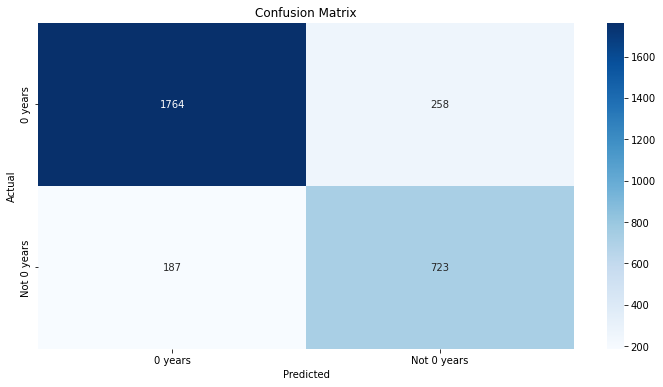

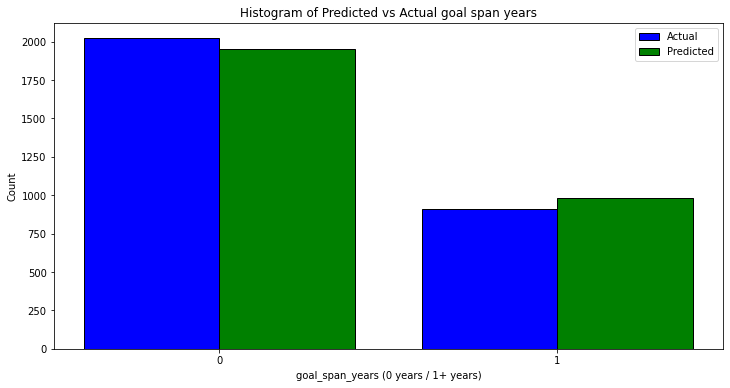

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and plot the binary career goal_span_years target variable
player_stats['goal_span_binary'] = player_stats['goal_span_years'].apply(lambda x: 0 if x <= 1 else 1)

# Drop unnecessary columns
player_stats = player_stats.drop(columns=['first_goal_date', 'last_goal_date', 'scorer', 'goal_span_days', 'goal_span_years' ,'team', 'total_goals' ,'match_count', 'penalty_goals', 'own_goals'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
player_stats_imputed = pd.DataFrame(imputer.fit_transform(player_stats), columns=player_stats.columns)

# Define features and target
X = player_stats_imputed.drop(columns=['goal_span_binary'])
y = player_stats_imputed['goal_span_binary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['0 years', 'Not 0 years'])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

# Visualization: Feature Importances
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Visualization: Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0 years', 'Not 0 years'], yticklabels=['0 years', 'Not 0 years'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualization: Predicted vs Actual as Histogram
plt.figure(figsize=(12, 6))
plt.hist([y_test, y_pred], color=['blue', 'green'], label=['Actual', 'Predicted'], bins=np.arange(3)-0.5, edgecolor='black')
plt.xticks(range(2))
plt.xlabel("goal_span_years (0 years / 1+ years)")
plt.ylabel("Count")
plt.title("Histogram of Predicted vs Actual goal span years")
plt.legend(loc="upper right")
plt.show()

## Results
### Model Accuracy
The model achieved an accuracy of 0.848, indicating it correctly classified 84.8% of the instances. This suggests the model is effective in distinguishing between short-term and long-term players.

### Classification Report
- **0 years:** The precision and recall values indicate a high level of accuracy in predicting short-term goal spans.
- **Not 0 years:** The model shows a slightly lower performance in predicting long-term goal spans, but still maintains a reasonable level of accuracy.

### Confusion Matrix
The confusion matrix shows that the model is more likely to correctly identify short-term players than long-term players, as indicated by the higher number of true positives for the "0 years" class.

### Feature Importances
The features influencing the model's predictions are related to the timing and consistency of goal scoring, which are critical factors in determining the length of a player's goal-scoring career.

### Reflection
The choice of features and the use of the Random Forest Classifier provided a robust model for predicting the goal span of players. The high accuracy and meaningful feature importances suggest that the model effectively captures the underlying patterns in the data. Further improvements could involve exploring additional features or tuning the model's hyperparameters for even better performance.



## Challenges in Formulating a Question

### Dataset Limitations:
While working with the goalscorers dataset, we found it difficult to formulate a meaningful question due to its limitations. The lack of unique identifiers and the potential for duplicate player entries made it challenging to aggregate and analyze player statistics accurately. This limitation impacted our ability to generate insightful and impactful questions.

### Reflection:
Despite these challenges, we aimed to extract meaningful insights by predicting whether a player's goal span would be short-term or long-term. The dataset's limitations necessitated a careful selection of features and consideration of potential biases. We acknowledge that the quality of the dataset significantly impacts the robustness of our analysis and the conclusions drawn.